
# Dataset: Estadísticas de jugadores de Fifa 2021.

### Objetivo GENERAL:
* Desarrollar un modelo de regresión lineal que prediga el Overall (OVA) de los jugadores de FIFA 21 basado en sus características, con el fin de entender y predecir la calidad general de los jugadores en el juego.

### Objetivos ESPECIFICOS:
1. Preprocesamiento de Datos:
  * Realizar un análisis exploratorio de datos (EDA) para comprender la distribución y la calidad de los datos, así como identificar posibles problemas como valores faltantes y valores atípicos.
  * Codificar las características categóricas y manejar los valores faltantes de manera apropiada para preparar los datos para el modelado.
2. Modelado de Regresión Lineal:
  * Construir un modelo de regresión lineal utilizando las características seleccionadas como variables predictoras y el OVA como la variable objetivo.
  * Evaluar el rendimiento del modelo utilizando métricas de evaluación de regresión, como el error cuadrático medio (MSE) y el coeficiente de determinación (R²).
3. Selección de Características:
  * Realizar análisis de importancia de características para identificar las características más relevantes para predecir el OVA de los jugadores.
  * Explorar técnicas de selección de características, como la eliminación recursiva de características (RFE), para mejorar la precisión del modelo.
4. Validación del Modelo:
  * Dividir el conjunto de datos en conjuntos de entrenamiento y prueba para evaluar el rendimiento del modelo en datos no vistos.
  * Utilizar técnicas de validación cruzada para garantizar la robustez del modelo y evitar el sobreajuste.
5. Interpretación de Resultados:
  * Interpretar los coeficientes del modelo de regresión lineal para comprender la relación entre las características de los jugadores y su OVA.
  * Identificar las características que más influyen en la calidad general de los jugadores según el modelo.

### Integrantes:
- Natalia Mejía.
- Miguel Uribe.
- María Andrea Méndez.
- Nicolás Reyes.


# 1. EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import six


import jinja2
from tabulate import tabulate

# 1.1 Análisis preliminar del data set
Hemos quitado algunas columnas, dado que al consultar con expertos de FIFA 21, nos dieron información de aquellas columnas que solo hacen parte del data set para fines complementarios que no representan un valor significativo a nuestro análisis. Adicionalmente, hay columnas que se encuentran completamente vacías o que continen el mismo dato para todas las filas.

In [ ]:
#Leyendo dataset
df = pd.read_csv('/content/fifa21_male2.csv', low_memory=False)
df = df.sample(n=1000)

#Drop de columnas con valores mezclados
df = df.drop(["Hits","Value", "Wage", "Release Clause", "ID", "Name", "Club", "Position", "Player Photo", "Club Logo", "Flag Photo", "Team & Contract", "Growth", "Joined", "Loan Date End", "Contract", "Gender", "Composure", "W/F", "SM", "A/W", "D/W", "IR", "LS", "ST", "RS", "LW", "LF", "CF", "RF", "RW", "LAM", "CAM", "RAM", "LM", "LCM", "CM", "RCM", "RM", "LWB", "LDM", "CDM", "RDM", "RWB", "LB", "LCB", "CB", "RCB", "RB", "GK", "BP"], axis = 1)
#Codificación de foot
df

Age  OVA     Nationality  BOV  POT Height  Weight   foot  Attacking  \
7700    24   74          Mexico   75   80   5'7"  139lbs  Right        312   
951     31   75          France   74   75   6'0"  176lbs   Left        340   
4527    30   74  Czech Republic   74   74  5'11"  176lbs  Right        327   
14290   18   59         Morocco   60   76   6'2"  168lbs  Right        259   
5924    24   80         Denmark   81   84   6'1"  185lbs  Right        333   
...    ...  ...             ...  ...  ...    ...     ...    ...        ...   
8871    20   78          Brazil   78   78   6'1"  161lbs   Left        355   
13074   22   66          Brazil   65   71   5'9"  146lbs  Right        232   
200     33   74           Ghana   72   74  5'10"  187lbs  Right        330   
14591   22   63         Austria   65   70   6'4"  194lbs  Right        277   
6927    23   69          France   70   75  5'11"  154lbs  Right        324   

       Crossing  ...  GK Positioning  GK Reflexes  Total Stats  Base Stats  \
7700         63  ...              10           10         2002         428   
951          76  ...               9           15         1902         408   
4527         74  ...              11            6         1851         393   
14290        34  ...              12            8         1445         304   
5924         66  ...              11           11         2070         439   
...         ...  ...             ...          ...          ...         ...   
8871         76  ...               8           10         2101         439   
13074        61  ...               9            6         1730         372   
200          66  ...               3            5         1926         405   
14591        32  ...               5           12         1477         323   
6927         74  ...              14           15         1758         370   

       PAC  SHO  PAS  DRI  DEF  PHY  
7700    84   70   69   77   62   66  
951     77   68   73   74   49   67  
4527    80   71   70   76   36   60  
14290   60   57   43   55   29   60  
5924    61   70   76   75   77   80  
...    ...  ...  ...  ...  ...  ...  
8871    79   67   71   70   74   78  
13074   82   45   56   67   62   60  
200     53   66   71   68   70   77  
14591   54   62   43   60   27   77  
6927    73   68   63   72   43   51  

[1000 rows x 56 columns]

# 1.2 Limpieza de Datos.
Despues de quitar unas columnas de manera preliminar, decidimos modificar las columnas de "Height" y "Weight" a métricas estadarizadas internacionalmente sin unidades de medida. Por otro lado, se deben quitar las filas que contengan muchos nulos ya que pueden afectar negativamente la predicción.

In [ ]:
def convertir_a_cm(altura):
    pies, pulgadas = altura.split("'")
    pies = int(pies)
    pulgadas = int(pulgadas[:-1])  # Elimina el último carácter (la comilla doble)
    altura_cm = (pies * 12 + pulgadas) * 2.54
    return altura_cm
def convertir_a_kg(peso):
    peso_lbs = int(peso[:-3])  # Elimina "lbs" y convierte a entero
    peso_kg = peso_lbs * 0.453592  # 1 lb = 0.453592 kg
    return peso_kg

In [ ]:
df['Weight'] = df['Weight'].apply(convertir_a_kg)
df.Weight

7700     63.049288
951      79.832192
4527     79.832192
14290    76.203456
5924     83.914520
           ...    
8871     73.028312
13074    66.224432
200      84.821704
14591    87.996848
6927     69.853168
Name: Weight, Length: 1000, dtype: float64

In [ ]:
df['Height'] = df['Height'].apply(convertir_a_cm)
df.Height

7700     170.18
951      182.88
4527     180.34
14290    187.96
5924     185.42
          ...  
8871     185.42
13074    175.26
200      177.80
14591    193.04
6927     180.34
Name: Height, Length: 1000, dtype: float64

In [ ]:
df.isnull().sum()

Age                 0
OVA                 0
Nationality         0
BOV                 0
POT                 0
Height              0
Weight              0
foot                0
Attacking           0
Crossing            0
Finishing           0
Heading Accuracy    0
Short Passing       0
Volleys             3
Skill               0
Dribbling           0
Curve               3
FK Accuracy         0
Long Passing        0
Ball Control        0
Movement            0
Acceleration        0
Sprint Speed        0
Agility             3
Reactions           0
Balance             3
Power               0
Shot Power          0
Jumping             3
Stamina             0
Strength            0
Long Shots          0
Mentality           0
Aggression          0
Interceptions       0
Positioning         0
Vision              3
Penalties           0
Defending           0
Marking             0
Standing Tackle     0
Sliding Tackle      3
Goalkeeping         0
GK Diving           0
GK Handling         0
GK Kicking

In [ ]:
df = df.dropna()
df

Age  OVA     Nationality  BOV  POT  Height     Weight   foot  \
7700    24   74          Mexico   75   80  170.18  63.049288  Right   
951     31   75          France   74   75  182.88  79.832192   Left   
4527    30   74  Czech Republic   74   74  180.34  79.832192  Right   
14290   18   59         Morocco   60   76  187.96  76.203456  Right   
5924    24   80         Denmark   81   84  185.42  83.914520  Right   
...    ...  ...             ...  ...  ...     ...        ...    ...   
8871    20   78          Brazil   78   78  185.42  73.028312   Left   
13074   22   66          Brazil   65   71  175.26  66.224432  Right   
200     33   74           Ghana   72   74  177.80  84.821704  Right   
14591   22   63         Austria   65   70  193.04  87.996848  Right   
6927    23   69          France   70   75  180.34  69.853168  Right   

       Attacking  Crossing  ...  GK Positioning  GK Reflexes  Total Stats  \
7700         312        63  ...              10           10         2002   
951          340        76  ...               9           15         1902   
4527         327        74  ...              11            6         1851   
14290        259        34  ...              12            8         1445   
5924         333        66  ...              11           11         2070   
...          ...       ...  ...             ...          ...          ...   
8871         355        76  ...               8           10         2101   
13074        232        61  ...               9            6         1730   
200          330        66  ...               3            5         1926   
14591        277        32  ...               5           12         1477   
6927         324        74  ...              14           15         1758   

       Base Stats  PAC  SHO  PAS  DRI  DEF  PHY  
7700          428   84   70   69   77   62   66  
951           408   77   68   73   74   49   67  
4527          393   80   71   70   76   36   60  
14290         304   60   57   43   55   29   60  
5924          439   61   70   76   75   77   80  
...           ...  ...  ...  ...  ...  ...  ...  
8871          439   79   67   71   70   74   78  
13074         372   82   45   56   67   62   60  
200           405   53   66   71   68   70   77  
14591         323   54   62   43   60   27   77  
6927          370   73   68   63   72   43   51  

[997 rows x 56 columns]

In [ ]:
df.isnull().sum()

Age                 0
OVA                 0
Nationality         0
BOV                 0
POT                 0
Height              0
Weight              0
foot                0
Attacking           0
Crossing            0
Finishing           0
Heading Accuracy    0
Short Passing       0
Volleys             0
Skill               0
Dribbling           0
Curve               0
FK Accuracy         0
Long Passing        0
Ball Control        0
Movement            0
Acceleration        0
Sprint Speed        0
Agility             0
Reactions           0
Balance             0
Power               0
Shot Power          0
Jumping             0
Stamina             0
Strength            0
Long Shots          0
Mentality           0
Aggression          0
Interceptions       0
Positioning         0
Vision              0
Penalties           0
Defending           0
Marking             0
Standing Tackle     0
Sliding Tackle      0
Goalkeeping         0
GK Diving           0
GK Handling         0
GK Kicking

Al notar que habían filas que contenían columnas en nulo, se eliminaron.

# 1.3. Gráficas del EDA.

In [ ]:
df

Age  OVA     Nationality  BOV  POT  Height     Weight   foot  \
7700    24   74          Mexico   75   80  170.18  63.049288  Right   
951     31   75          France   74   75  182.88  79.832192   Left   
4527    30   74  Czech Republic   74   74  180.34  79.832192  Right   
14290   18   59         Morocco   60   76  187.96  76.203456  Right   
5924    24   80         Denmark   81   84  185.42  83.914520  Right   
...    ...  ...             ...  ...  ...     ...        ...    ...   
8871    20   78          Brazil   78   78  185.42  73.028312   Left   
13074   22   66          Brazil   65   71  175.26  66.224432  Right   
200     33   74           Ghana   72   74  177.80  84.821704  Right   
14591   22   63         Austria   65   70  193.04  87.996848  Right   
6927    23   69          France   70   75  180.34  69.853168  Right   

       Attacking  Crossing  ...  GK Positioning  GK Reflexes  Total Stats  \
7700         312        63  ...              10           10         2002   
951          340        76  ...               9           15         1902   
4527         327        74  ...              11            6         1851   
14290        259        34  ...              12            8         1445   
5924         333        66  ...              11           11         2070   
...          ...       ...  ...             ...          ...          ...   
8871         355        76  ...               8           10         2101   
13074        232        61  ...               9            6         1730   
200          330        66  ...               3            5         1926   
14591        277        32  ...               5           12         1477   
6927         324        74  ...              14           15         1758   

       Base Stats  PAC  SHO  PAS  DRI  DEF  PHY  
7700          428   84   70   69   77   62   66  
951           408   77   68   73   74   49   67  
4527          393   80   71   70   76   36   60  
14290         304   60   57   43   55   29   60  
5924          439   61   70   76   75   77   80  
...           ...  ...  ...  ...  ...  ...  ...  
8871          439   79   67   71   70   74   78  
13074         372   82   45   56   67   62   60  
200           405   53   66   71   68   70   77  
14591         323   54   62   43   60   27   77  
6927          370   73   68   63   72   43   51  

[997 rows x 56 columns]

In [ ]:
df.shape

(997, 56)

In [ ]:
df.isnull().sum()

Age                 0
OVA                 0
Nationality         0
BOV                 0
POT                 0
Height              0
Weight              0
foot                0
Attacking           0
Crossing            0
Finishing           0
Heading Accuracy    0
Short Passing       0
Volleys             0
Skill               0
Dribbling           0
Curve               0
FK Accuracy         0
Long Passing        0
Ball Control        0
Movement            0
Acceleration        0
Sprint Speed        0
Agility             0
Reactions           0
Balance             0
Power               0
Shot Power          0
Jumping             0
Stamina             0
Strength            0
Long Shots          0
Mentality           0
Aggression          0
Interceptions       0
Positioning         0
Vision              0
Penalties           0
Defending           0
Marking             0
Standing Tackle     0
Sliding Tackle      0
Goalkeeping         0
GK Diving           0
GK Handling         0
GK Kicking

In [ ]:
columns=df.columns
columns

Index(['Age', 'OVA', 'Nationality', 'BOV', 'POT', 'Height', 'Weight', 'foot',
       'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy',
       'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve',
       'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY'],
      dtype='object')

<Axes: xlabel='OVA', ylabel='count'>

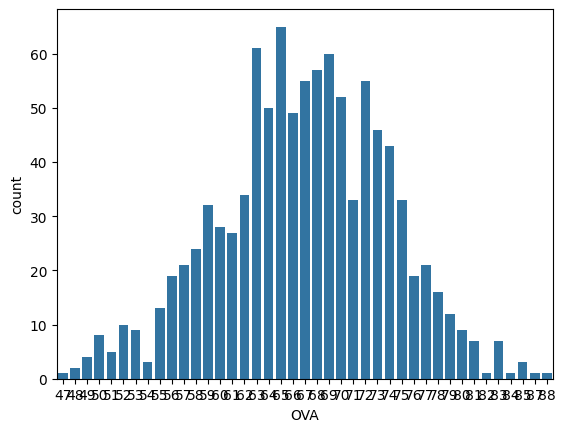

In [ ]:
sns.countplot(x = 'OVA', data = df)

### Conclusiones

Se puede observar que el dataset tiene un total de 995 filas y 58 columnas. De estas, ninguna fila o registro tiene valores nulos. Adicionalmente, se puede ver que el OVA (nuestro objetivo) se encuentra distribuido de forma normal y no se encuentran valores fuera del rango esperado.

In [ ]:
# Calcular la varianza de cada columna (excluyendo las columnas "Nationality" y "foot")
variances = df.drop(columns=df.select_dtypes(exclude=[np.number]).columns).var()

# Calcular la media de cada columna (excluyendo las columnas "Nationality" y "foot")
means = df.drop(columns=df.select_dtypes(exclude=[np.number]).columns).mean()

# Calcular la moda de cada columna (excluyendo las columnas "Nationality" y "foot")
modes = df.drop(columns=df.select_dtypes(exclude=[np.number]).columns).mode().iloc[0]  # Seleccionar solo el primer valor de la serie de moda

# Calcular la varianza, media y moda de la columna "Nationality" por separado
nationality_mode = df["Nationality"].mode().iloc[0]  # Seleccionar solo el primer valor de la serie de moda

# Calcular la varianza, media y moda de la columna "foot" por separado

foot_mode = df["foot"].mode().iloc[0]  # Seleccionar solo el primer valor de la serie de moda

# Imprimir los resultados
data = []
columnas_numericas = df.select_dtypes(include=[np.number])
for column in columnas_numericas:
      data.append([column, variances[column], means[column], modes[column]])

data.append(["Nationality", '','' ,nationality_mode])
data.append(["foot", '','' ,foot_mode])

# Mostrar la tabla con tabulate
table = tabulate(data, headers=["Columna", "Varianza", "Media", "Moda"], tablefmt="grid")
print(table)
num_columnas = columnas_numericas.shape[1]
print("Número de filas en columnas_no_numericas:", num_columnas)

+------------------+--------------------+--------------------+----------+
| Columna          | Varianza           | Media              | Moda     |
+==================+====================+====================+==========+
| Age              | 24.00494253845875  | 25.084252758274825 | 23.0     |
+------------------+--------------------+--------------------+----------+
| OVA              | 48.770737916560925 | 66.92678034102308  | 65.0     |
+------------------+--------------------+--------------------+----------+
| BOV              | 45.28192408550955  | 67.88064192577733  | 67.0     |
+------------------+--------------------+--------------------+----------+
| POT              | 31.743807728406107 | 72.64994984954865  | 74.0     |
+------------------+--------------------+--------------------+----------+
| Height           | 47.01155889113123  | 181.3361283851555  | 182.88   |
+------------------+--------------------+--------------------+----------+
| Weight           | 48.47354511709632

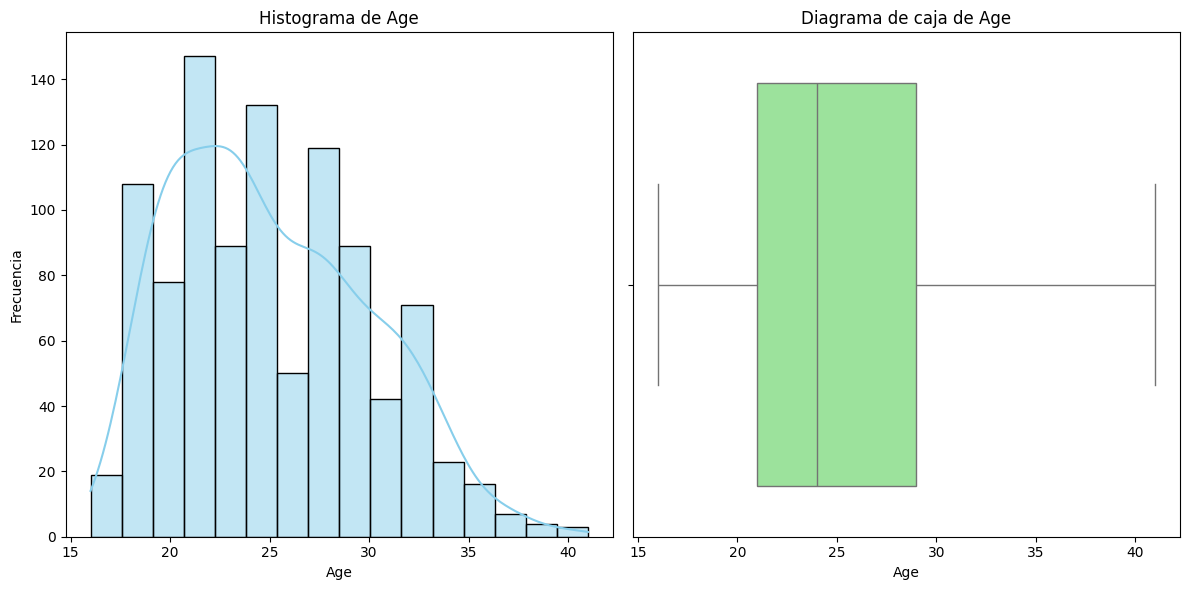

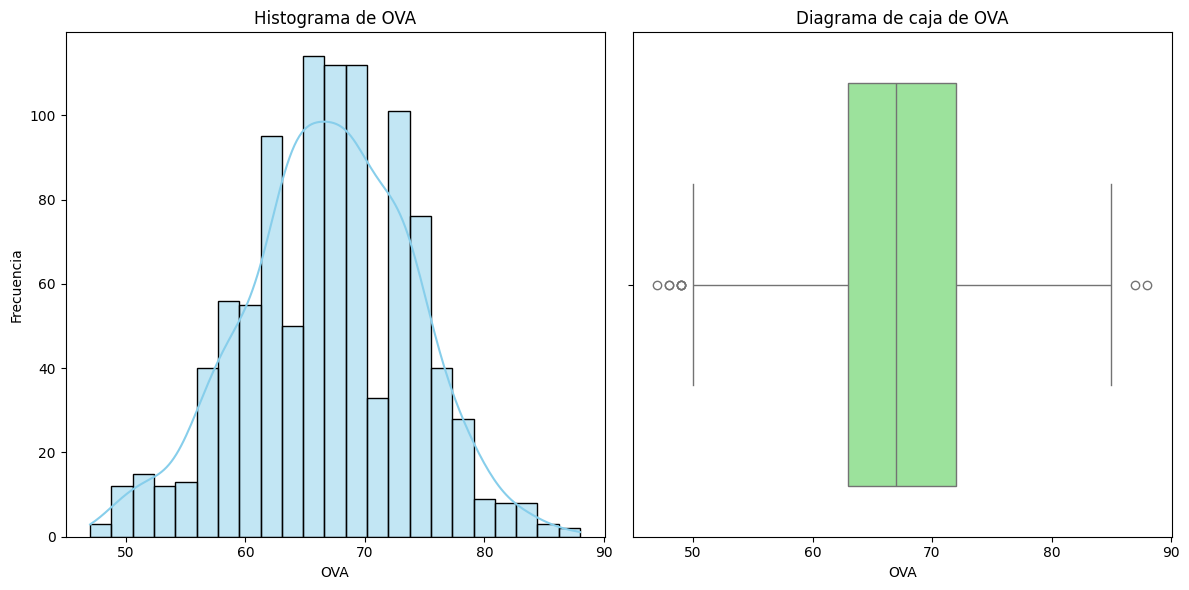

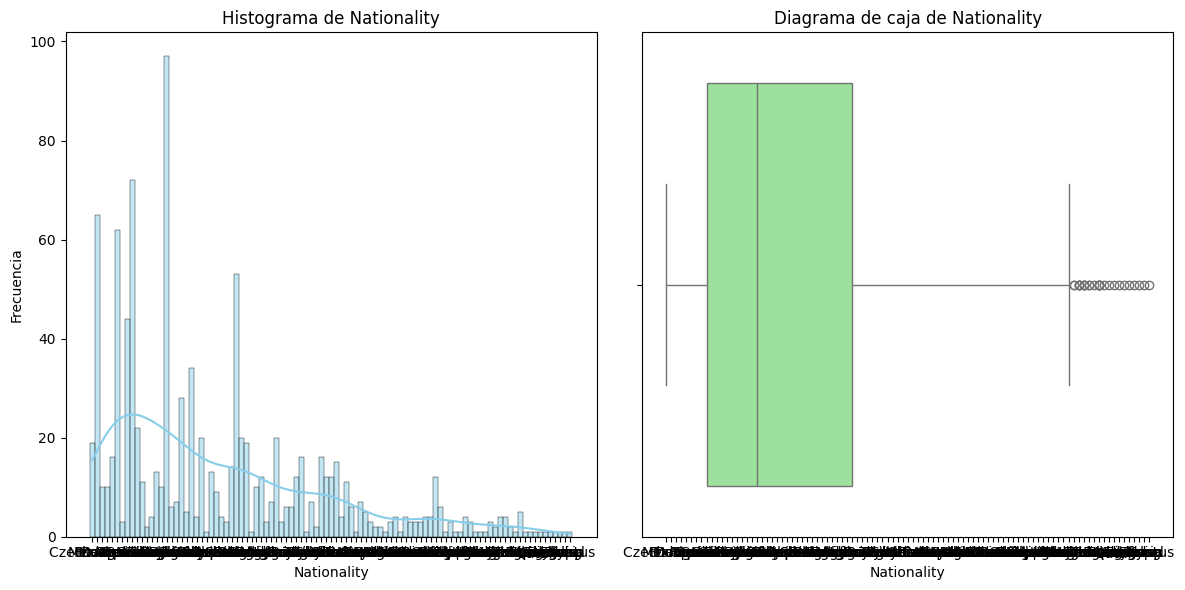

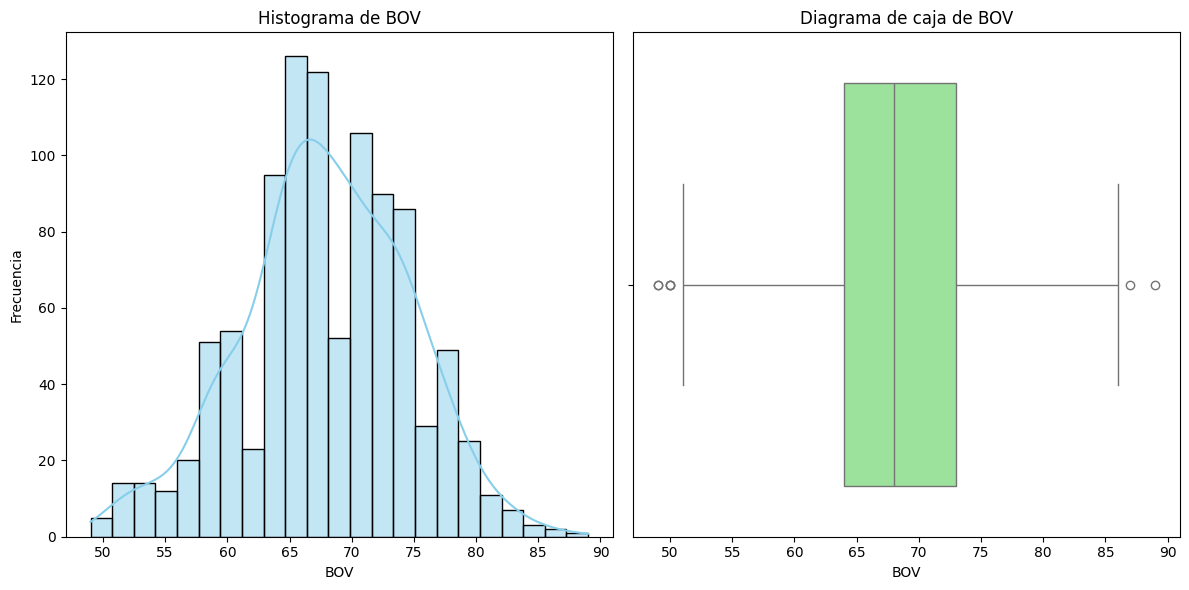

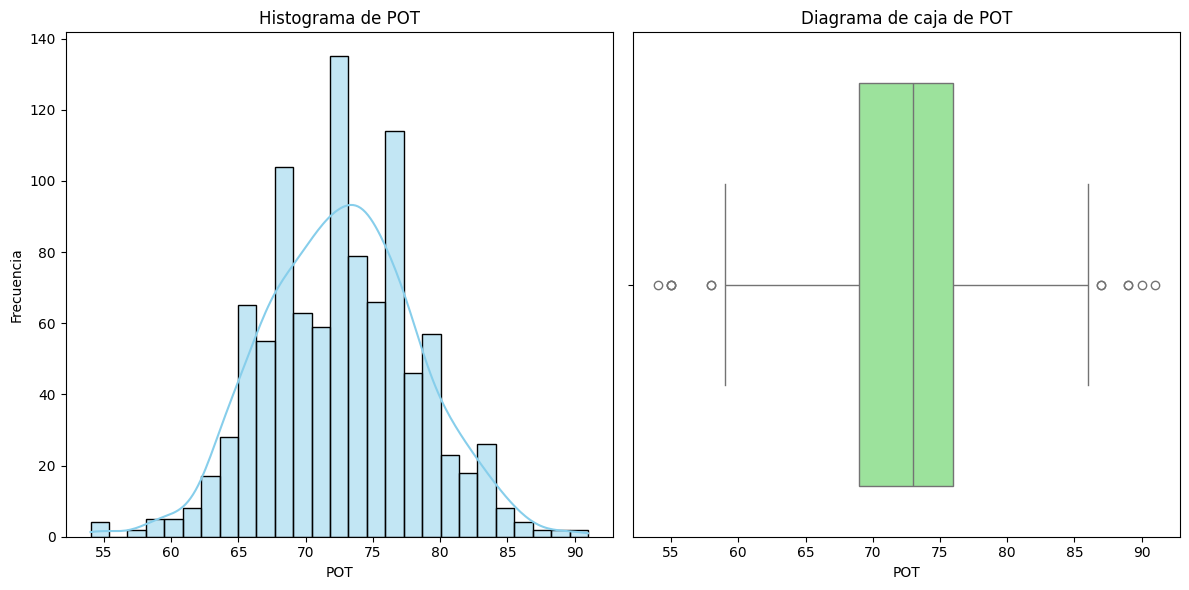

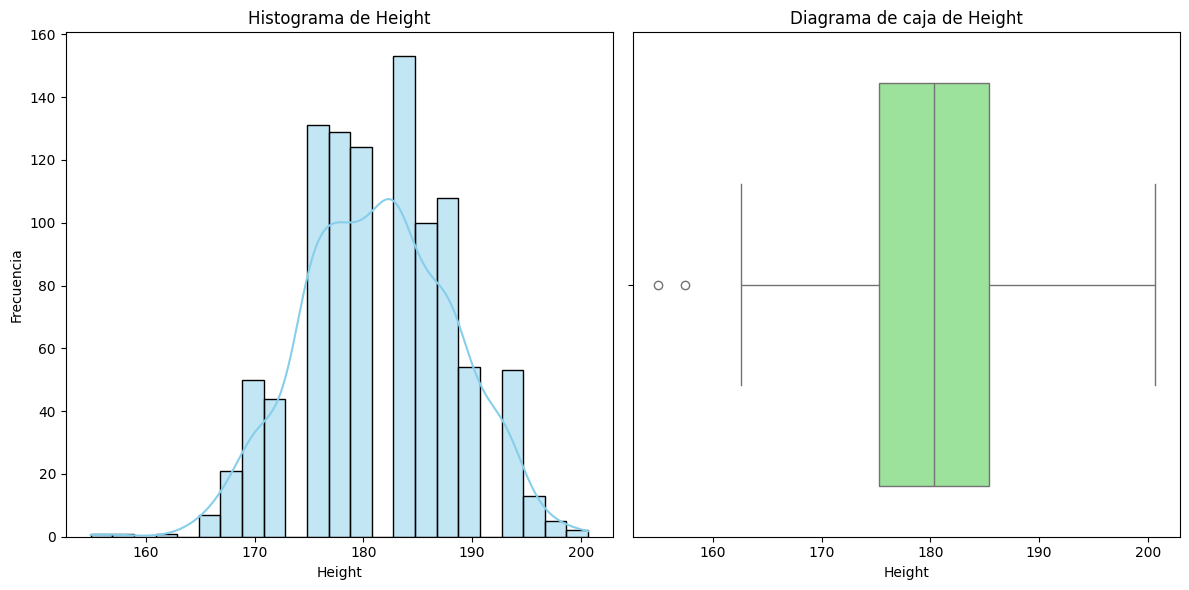

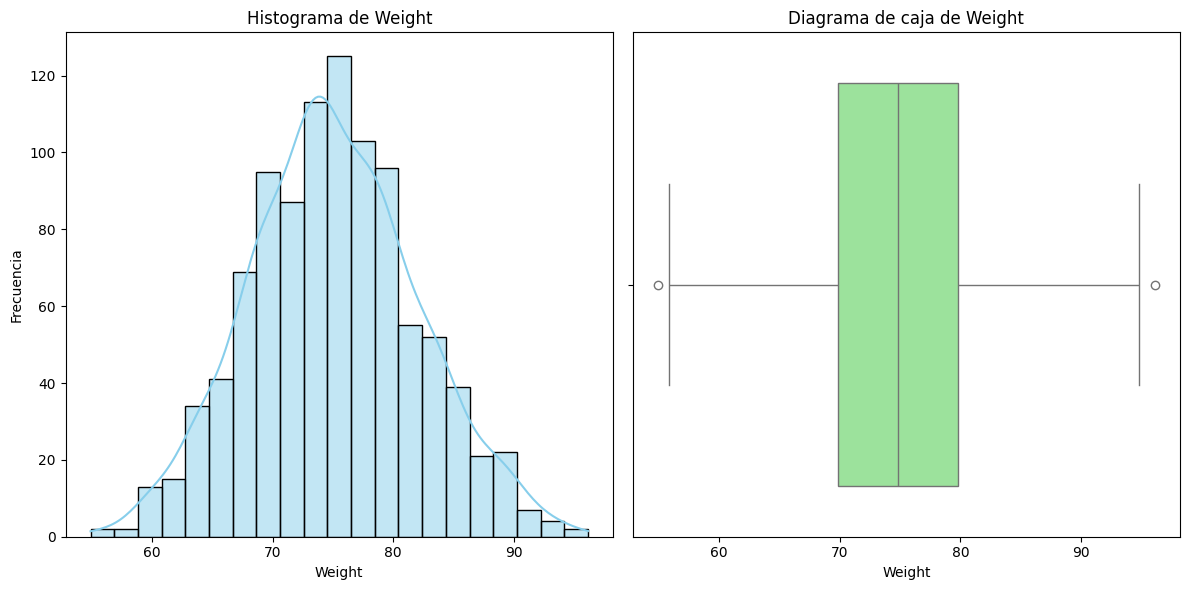

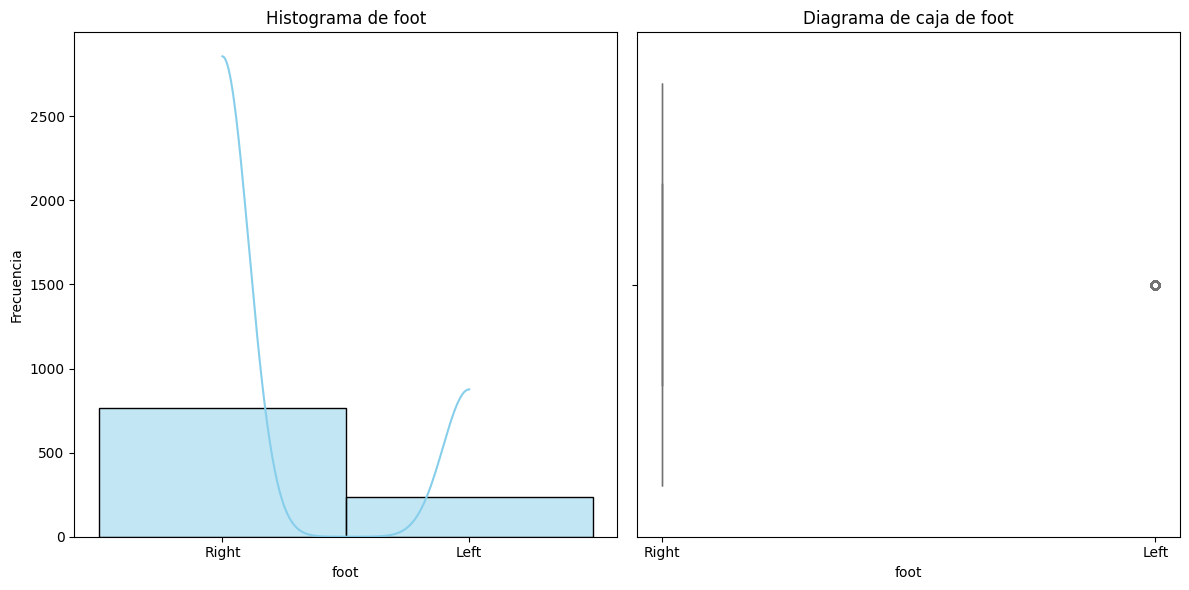

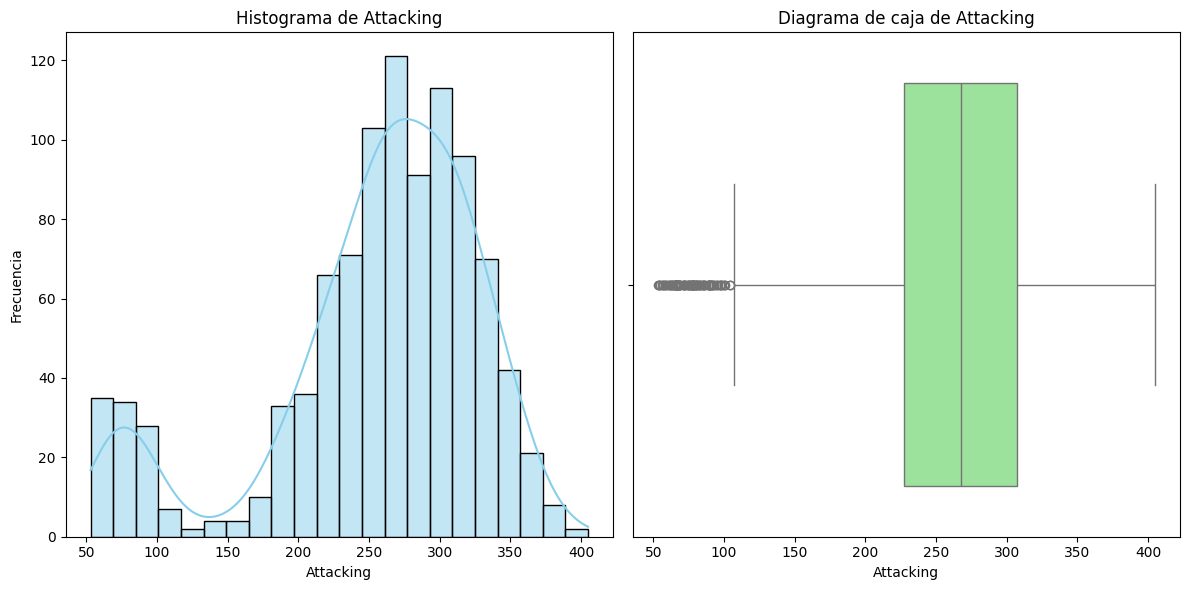

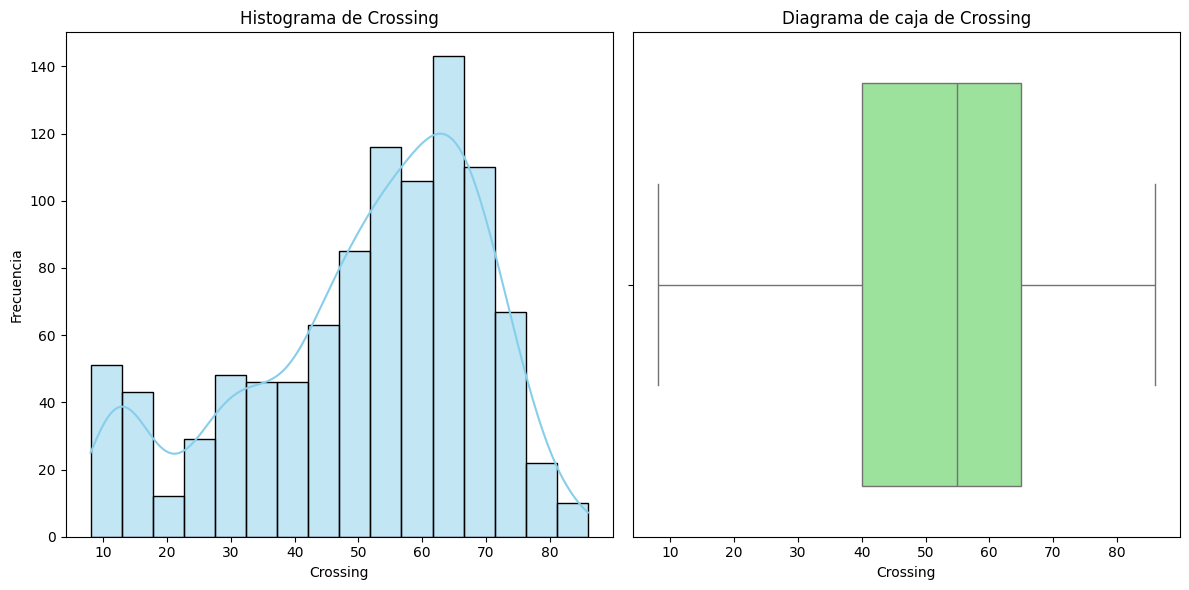

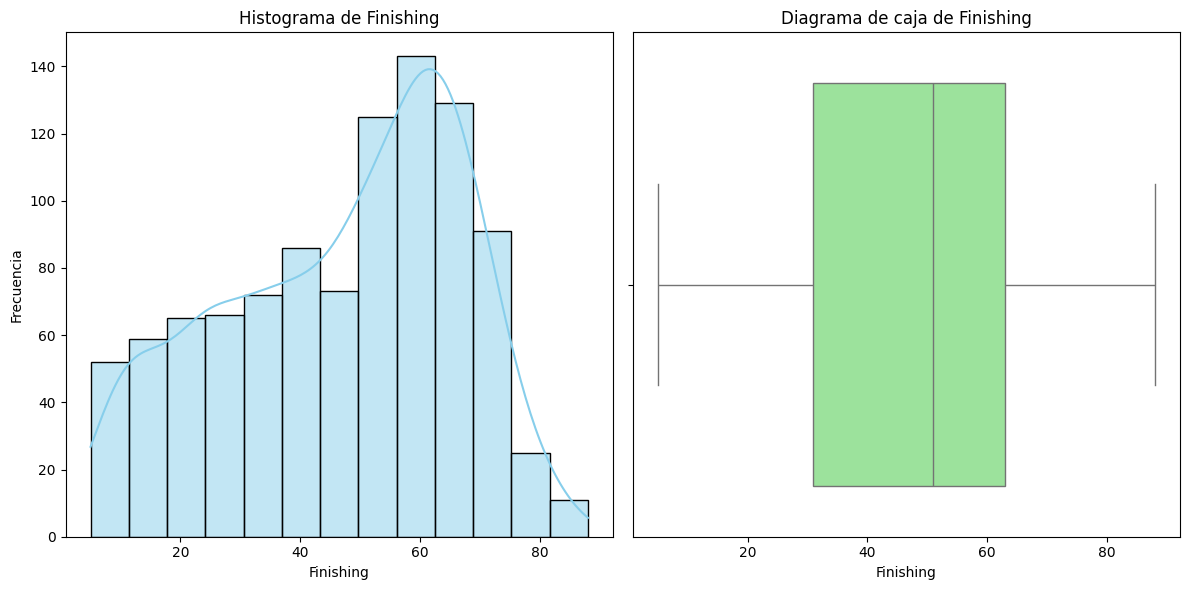

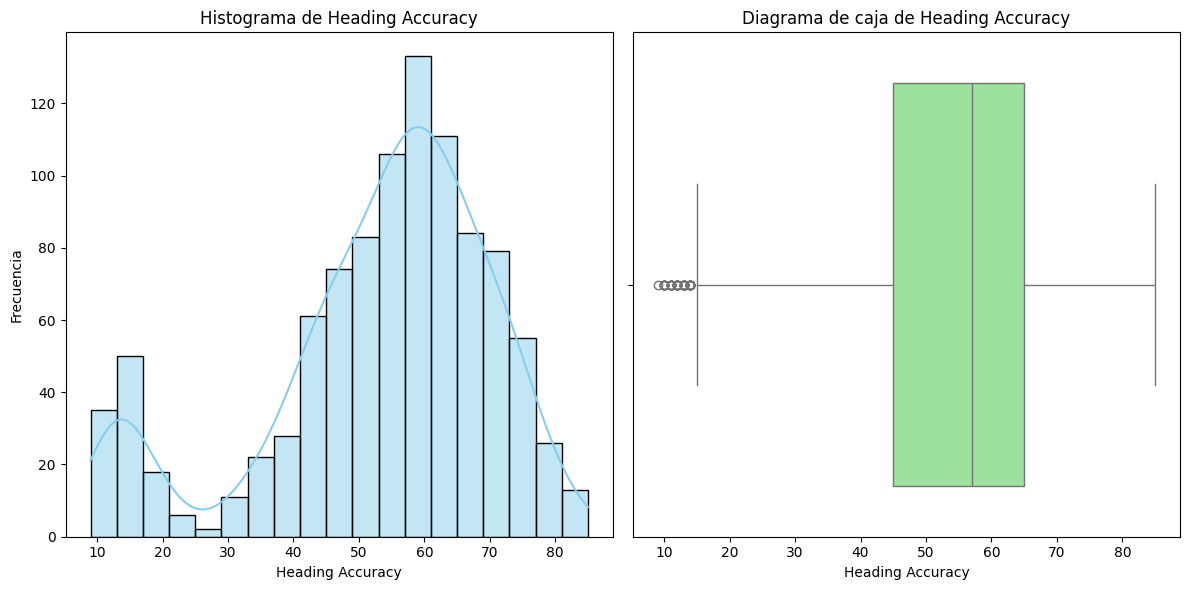

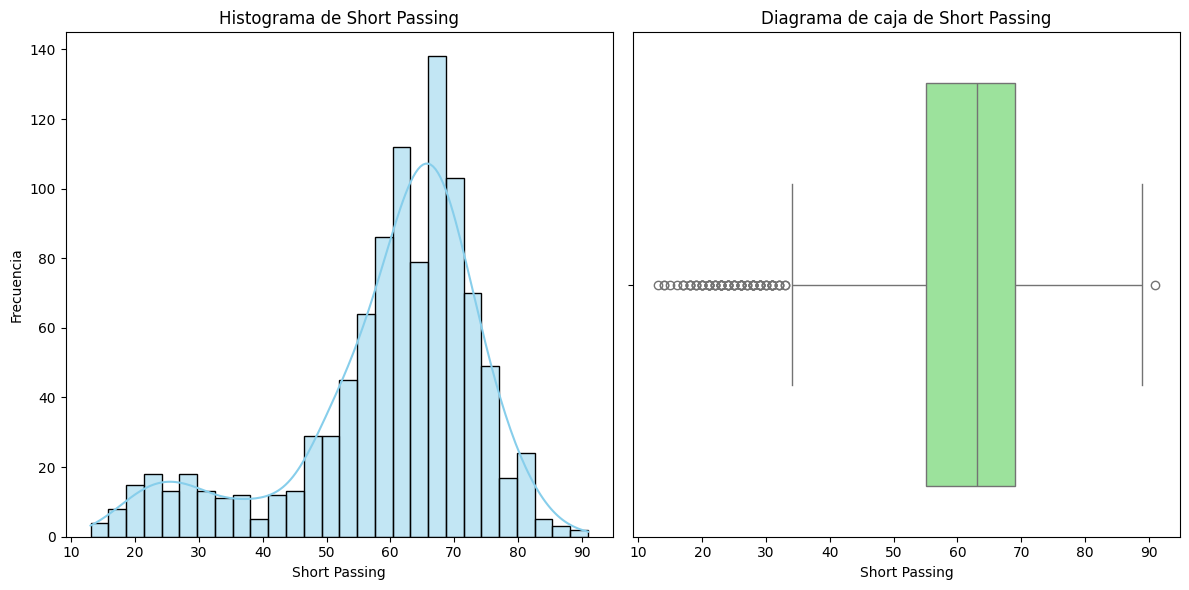

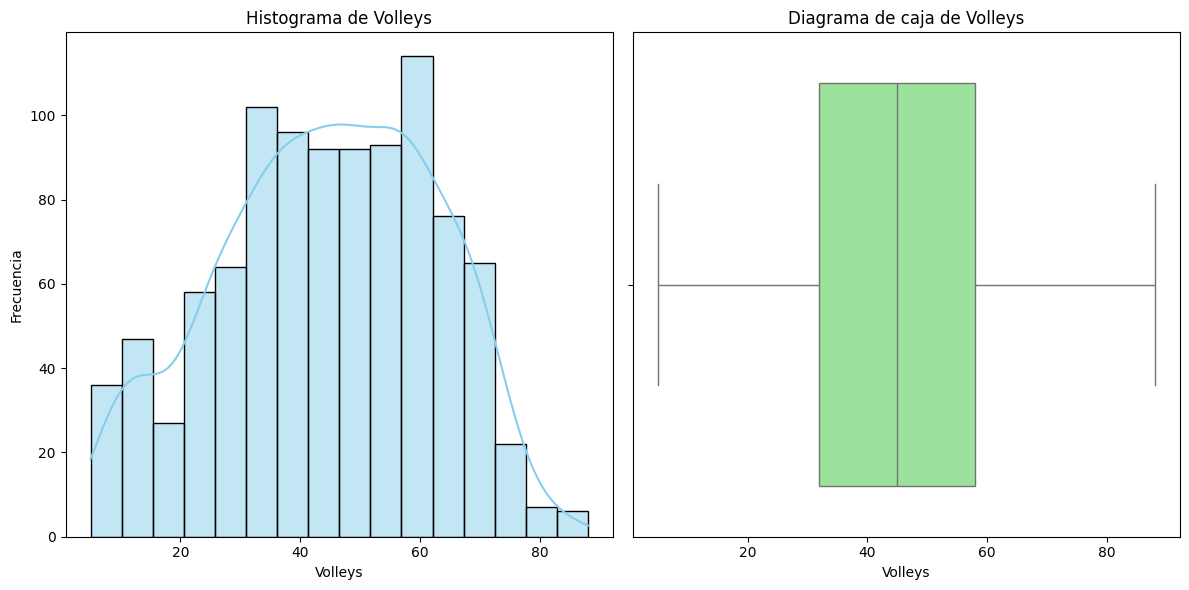

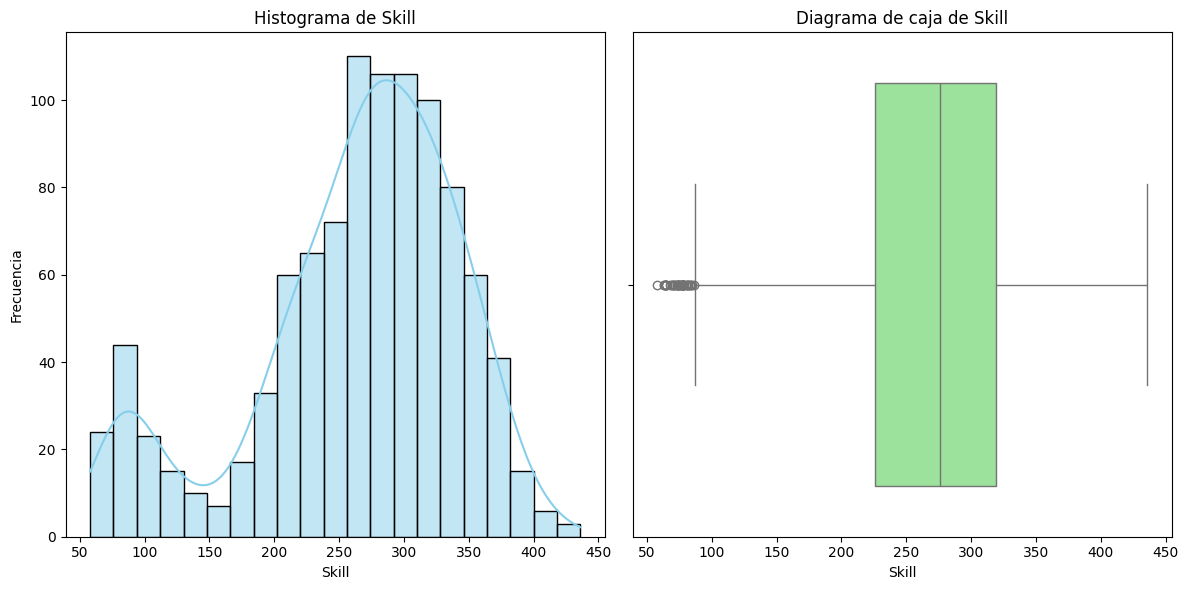

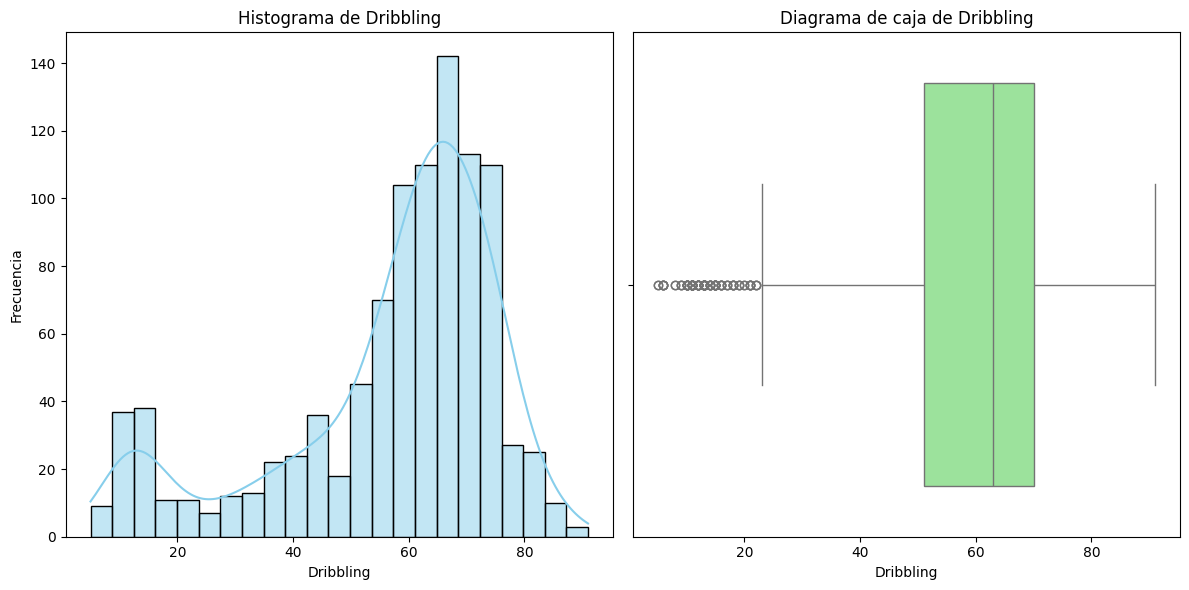

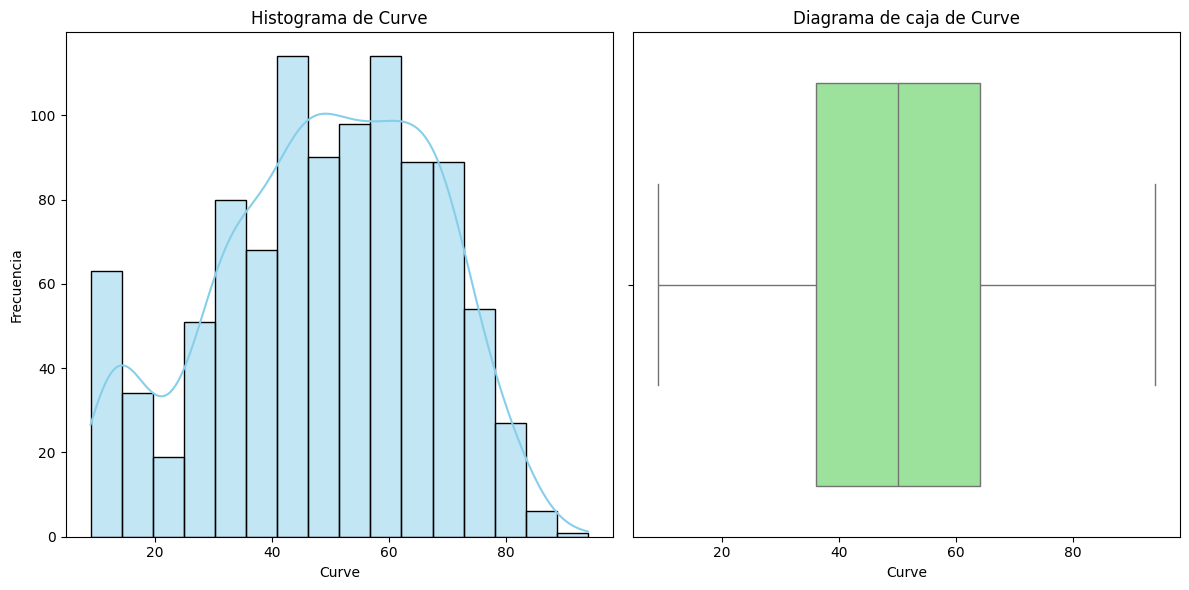

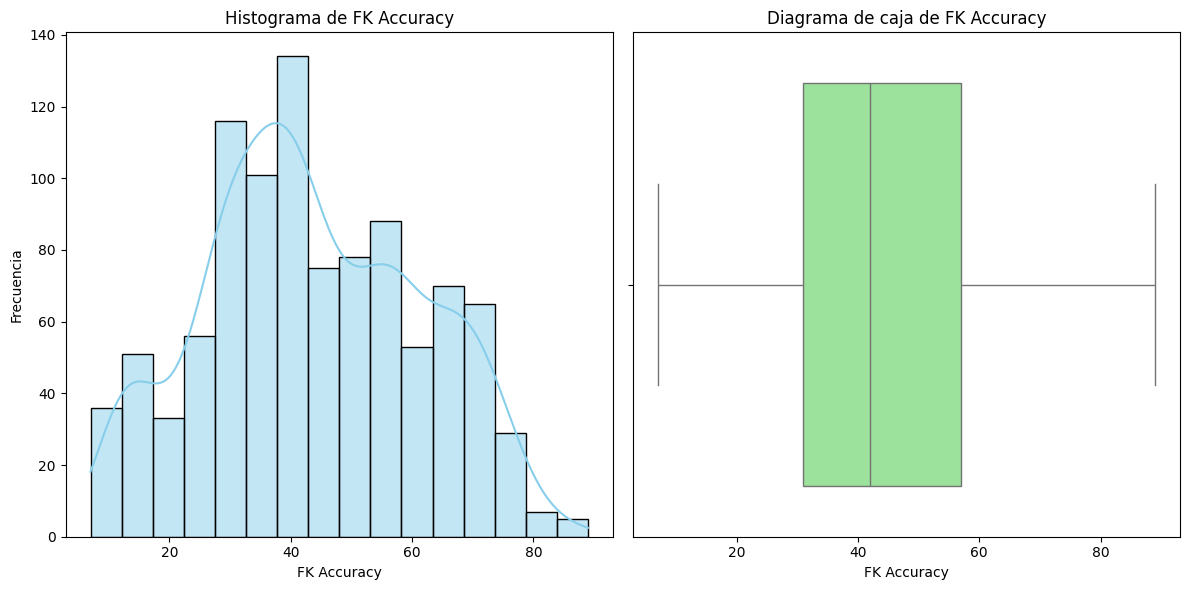

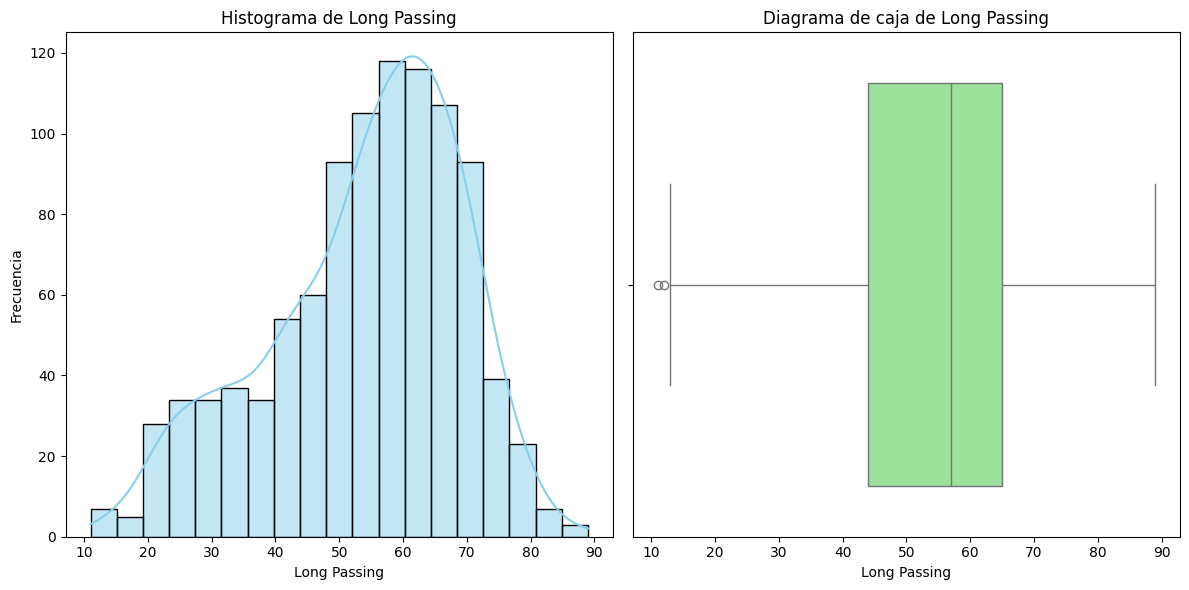

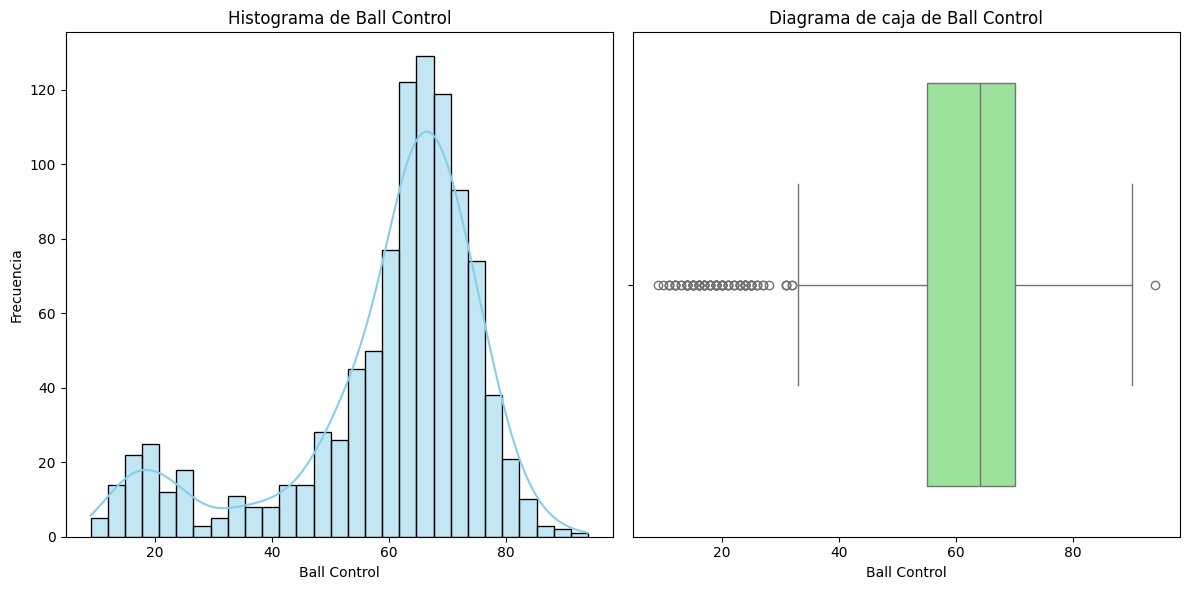

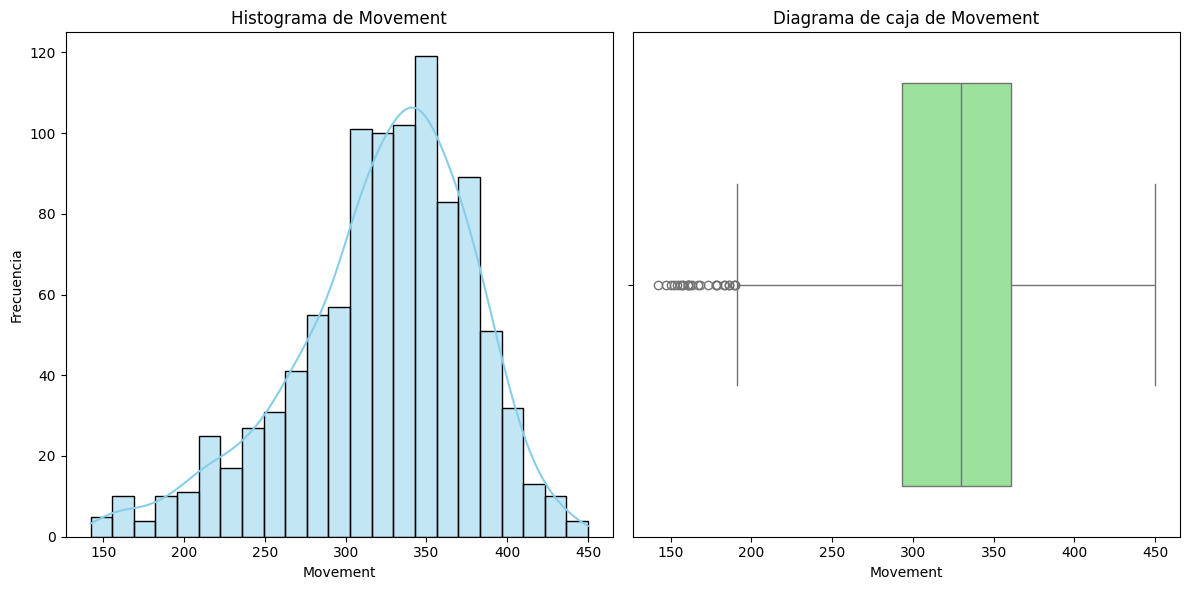

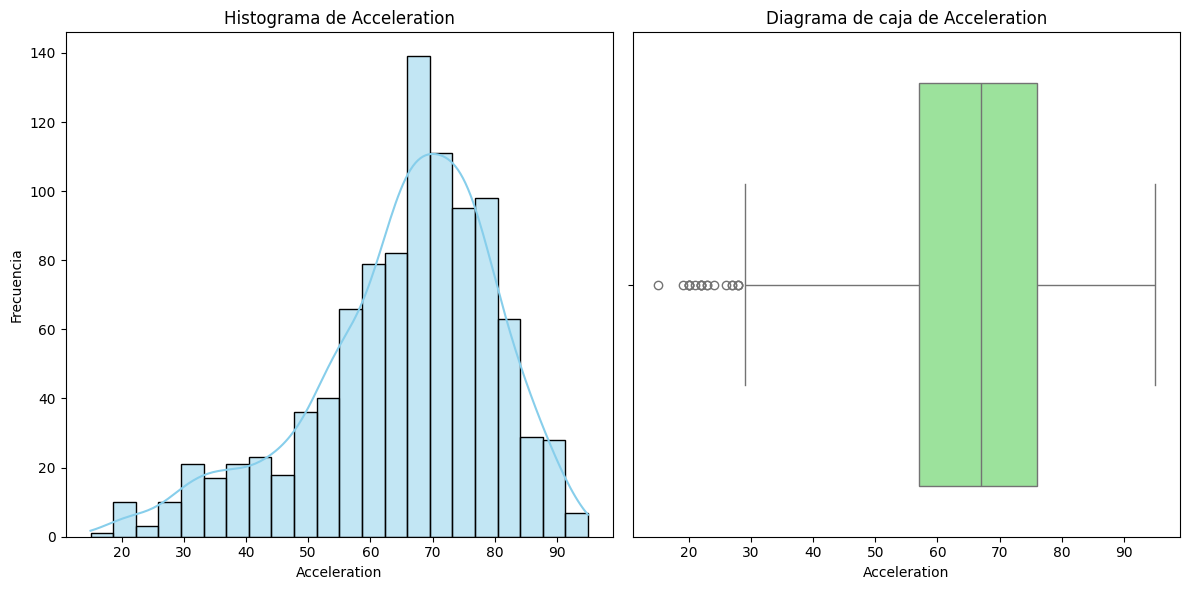

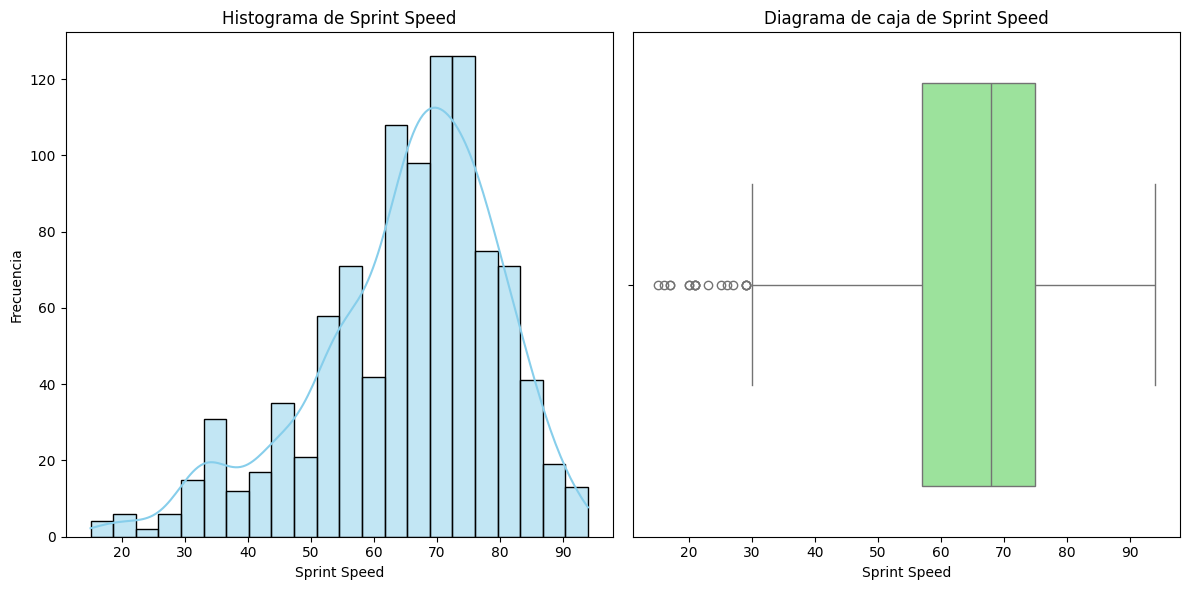

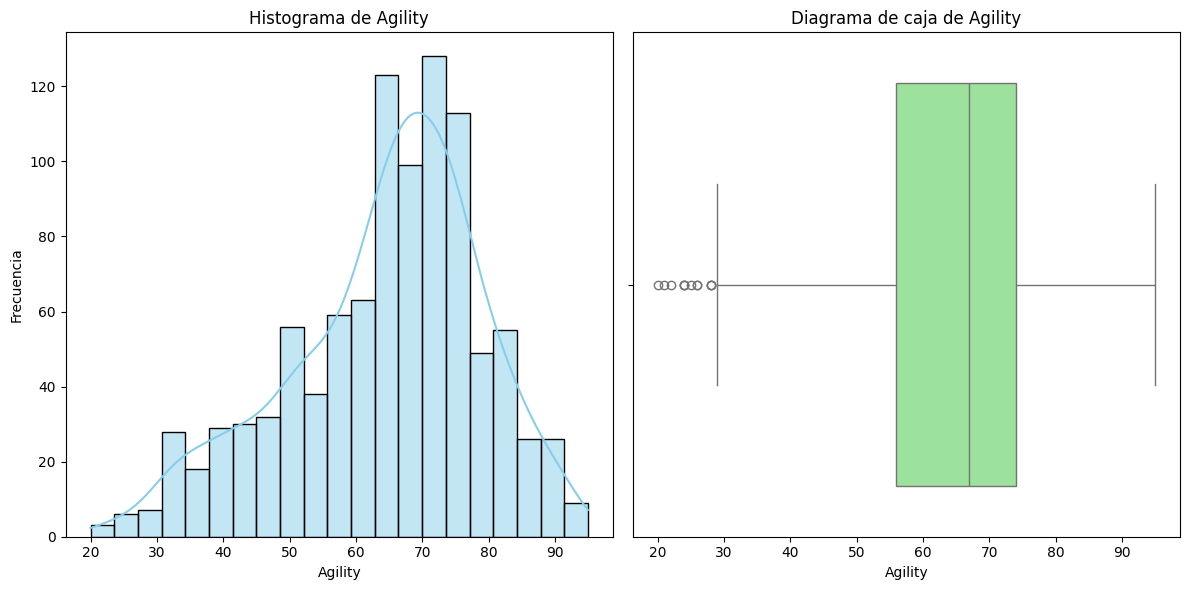

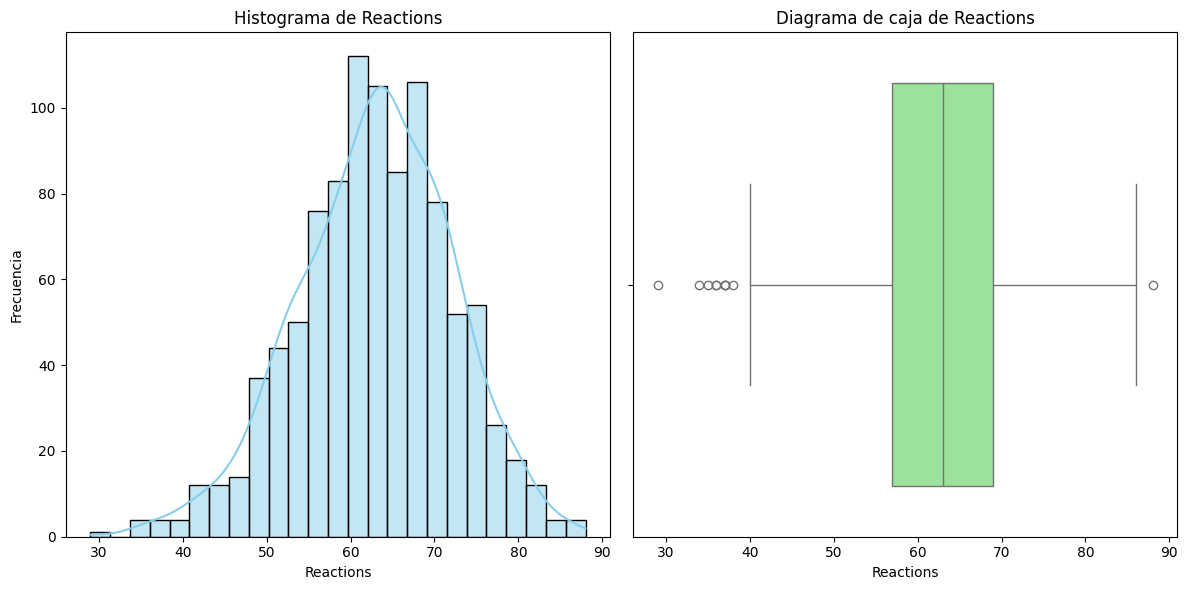

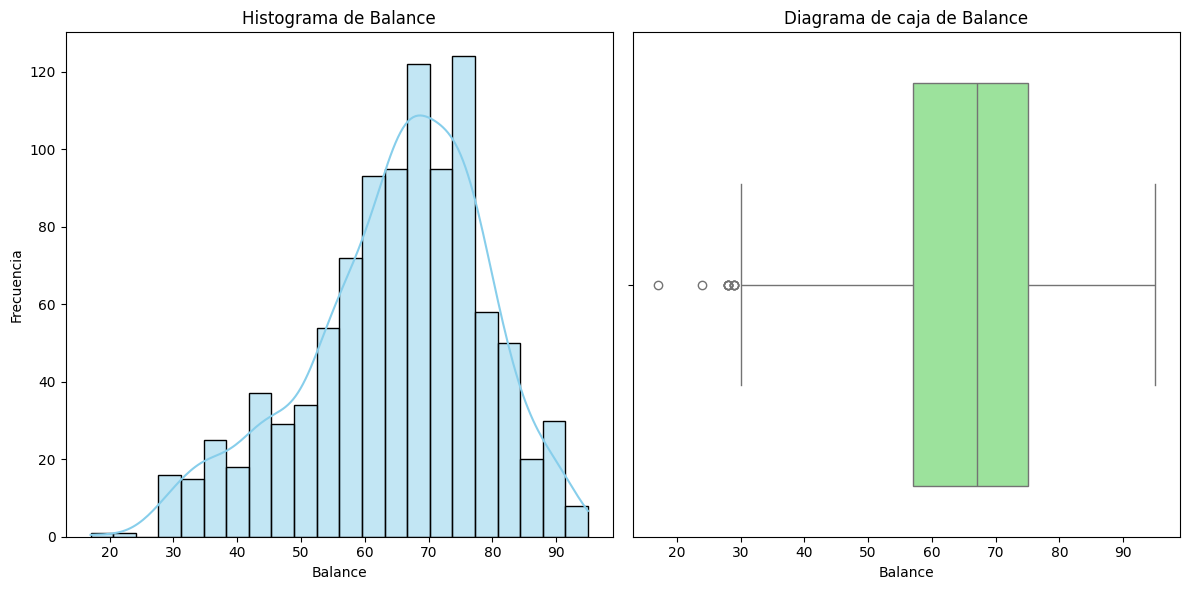

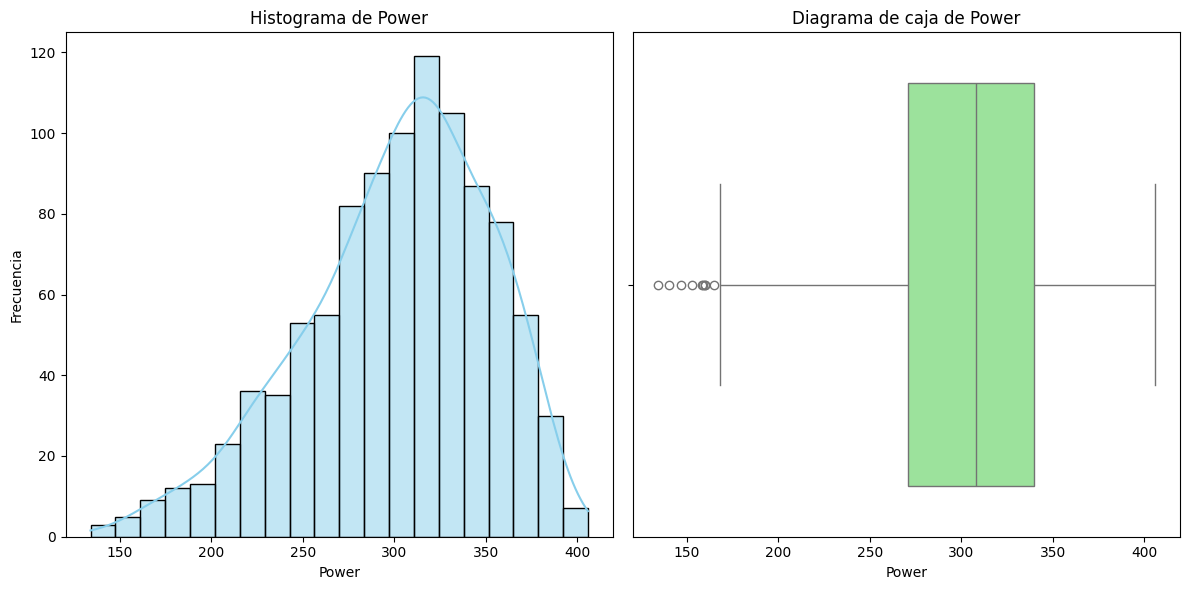

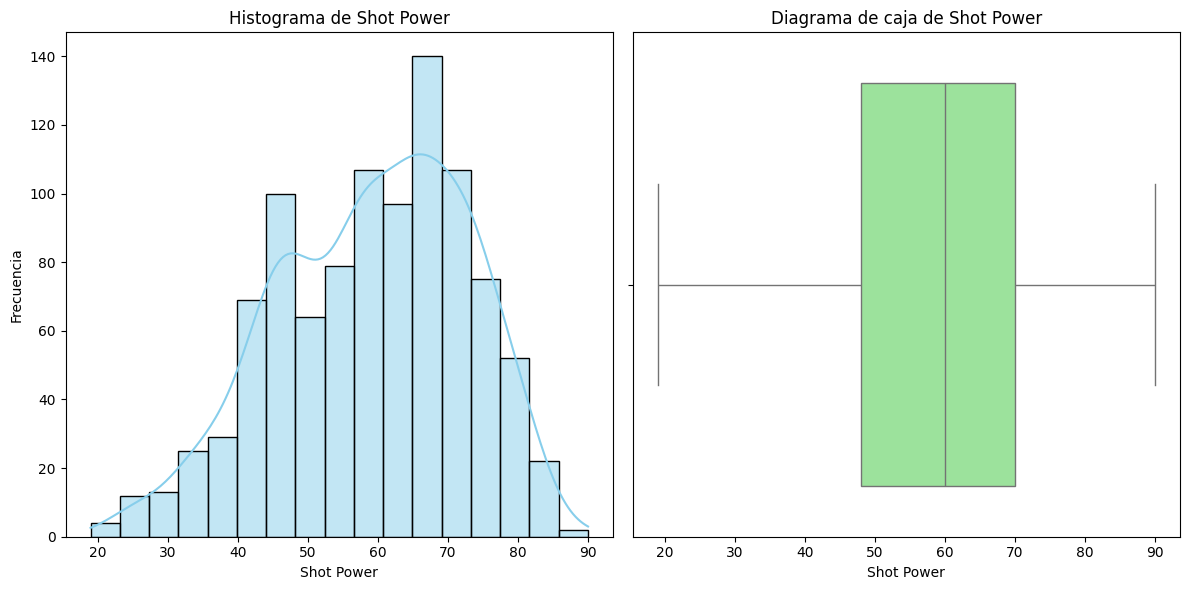

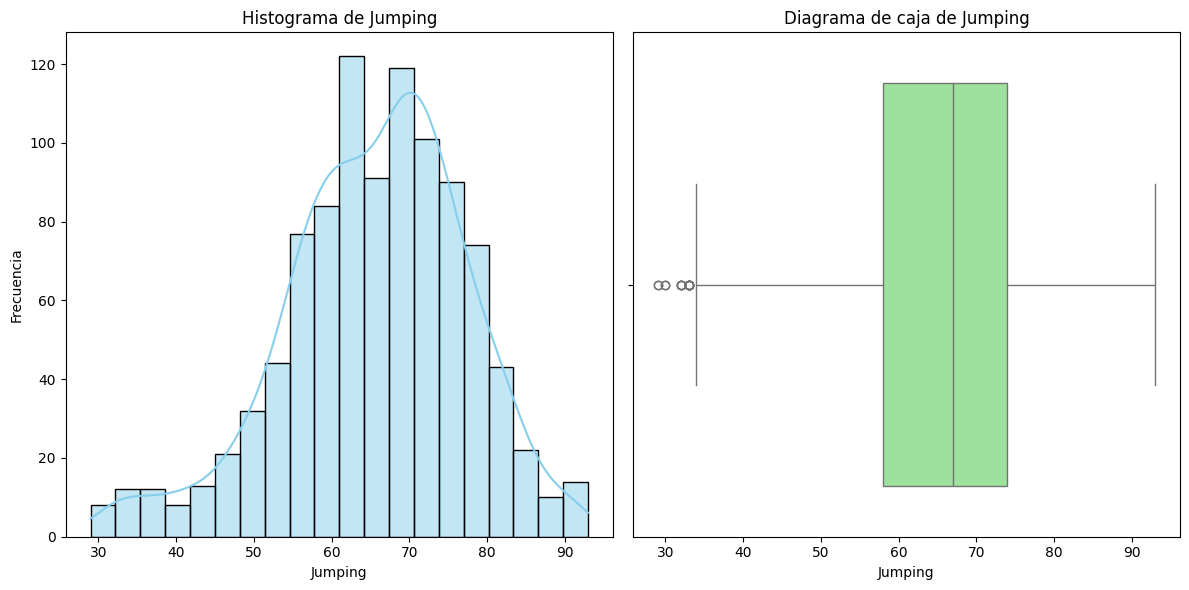

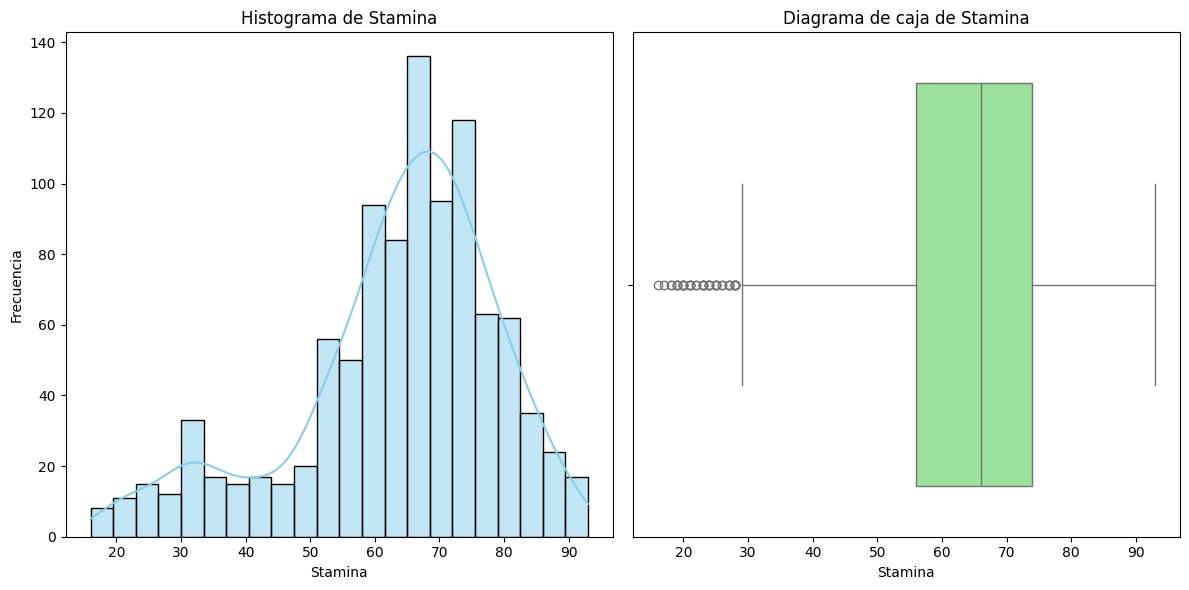

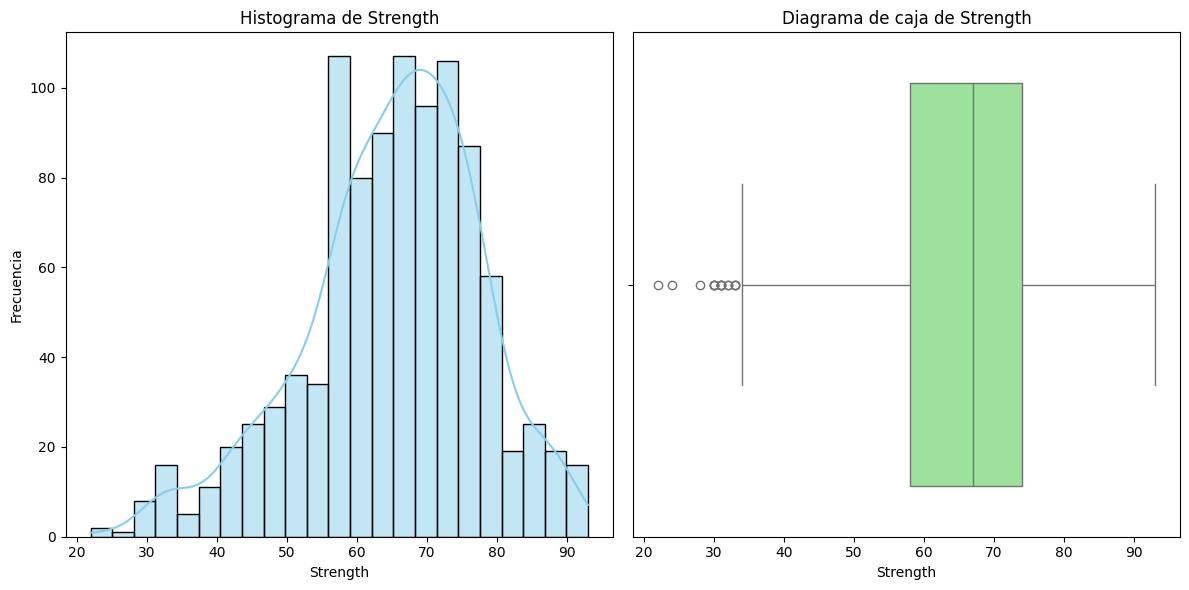

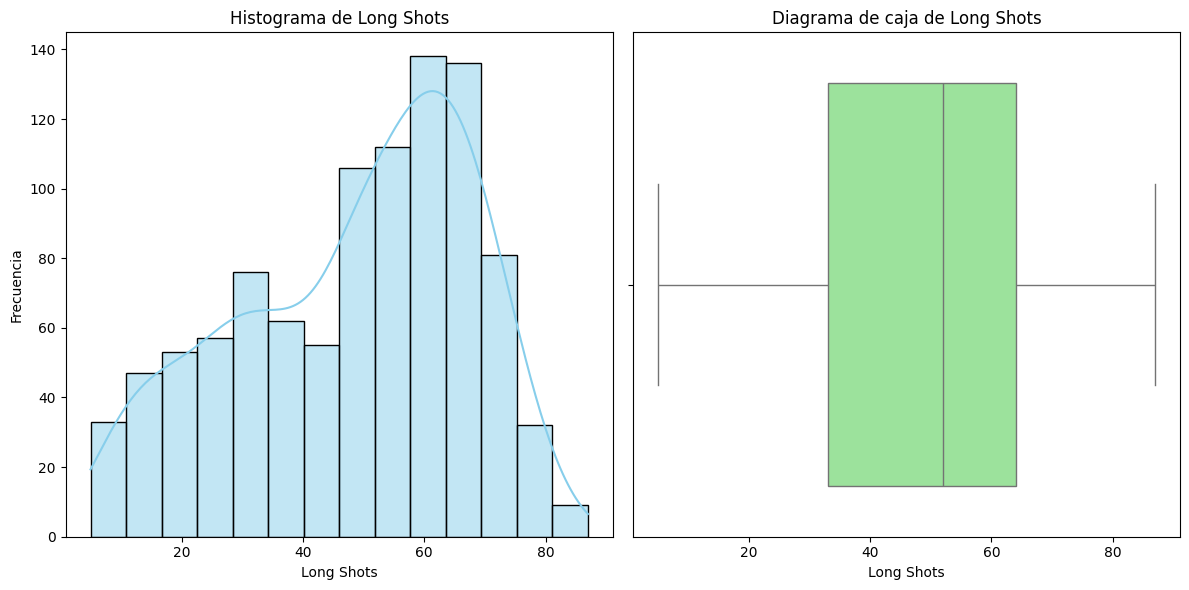

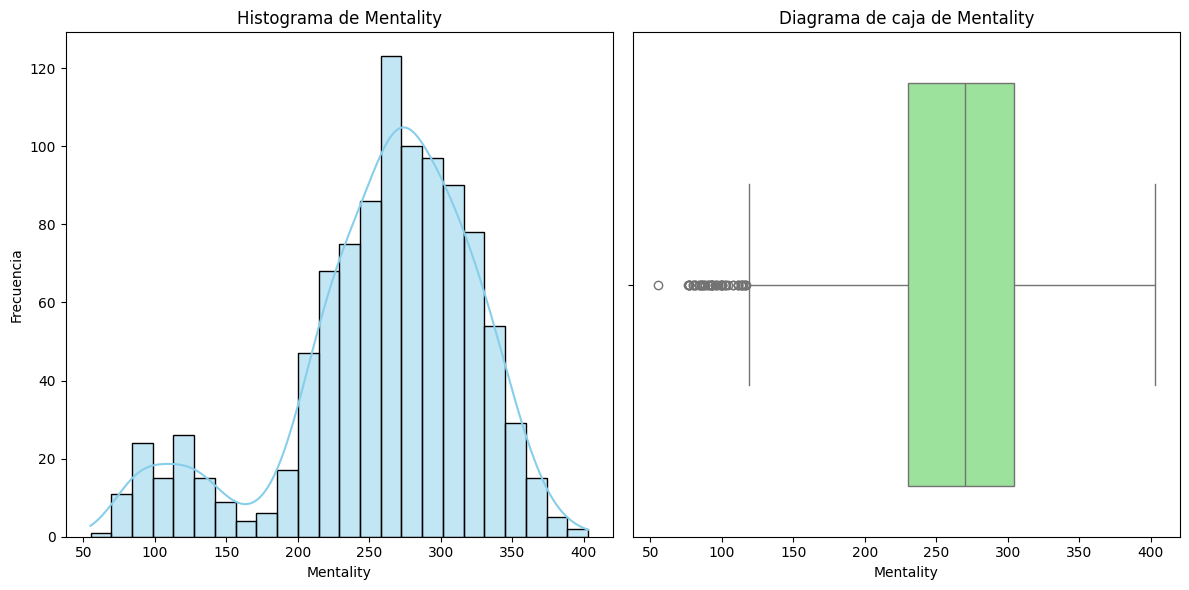

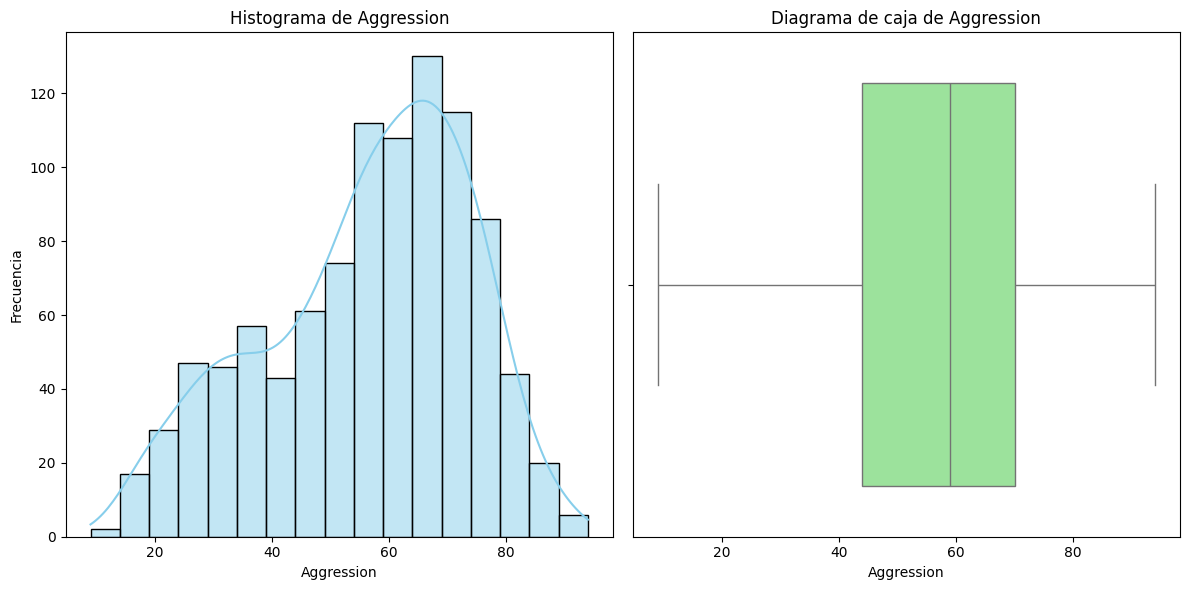

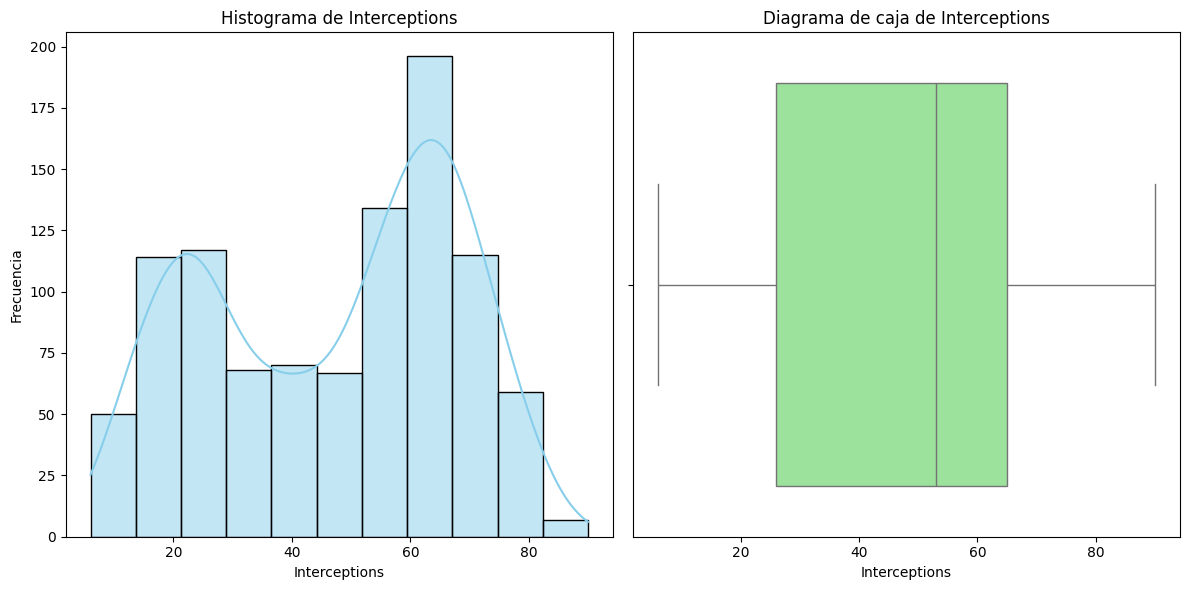

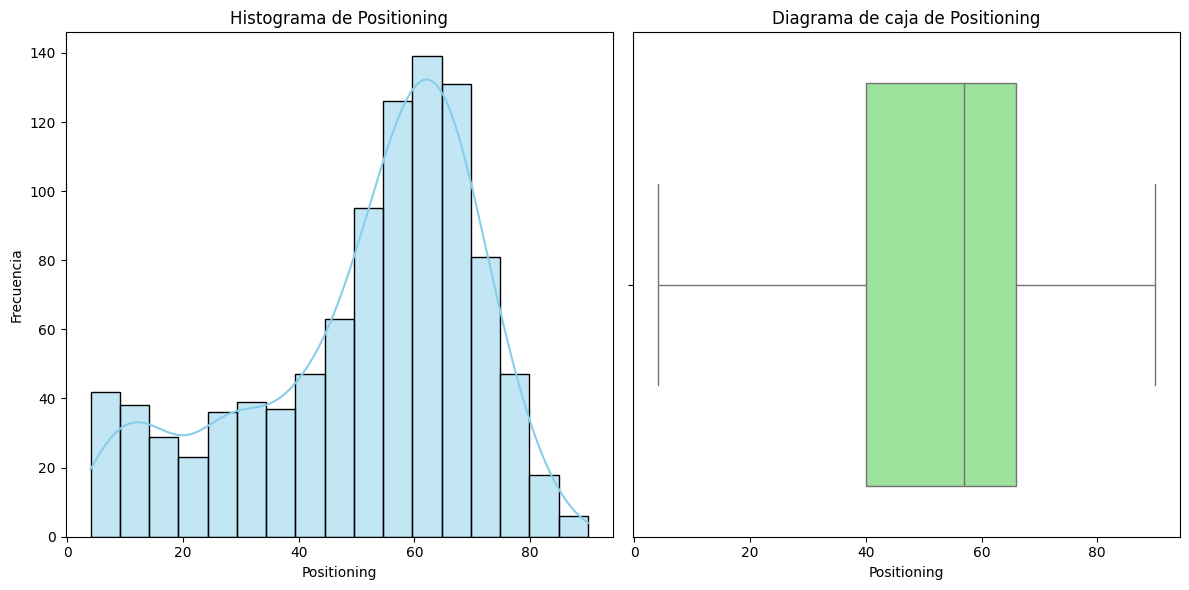

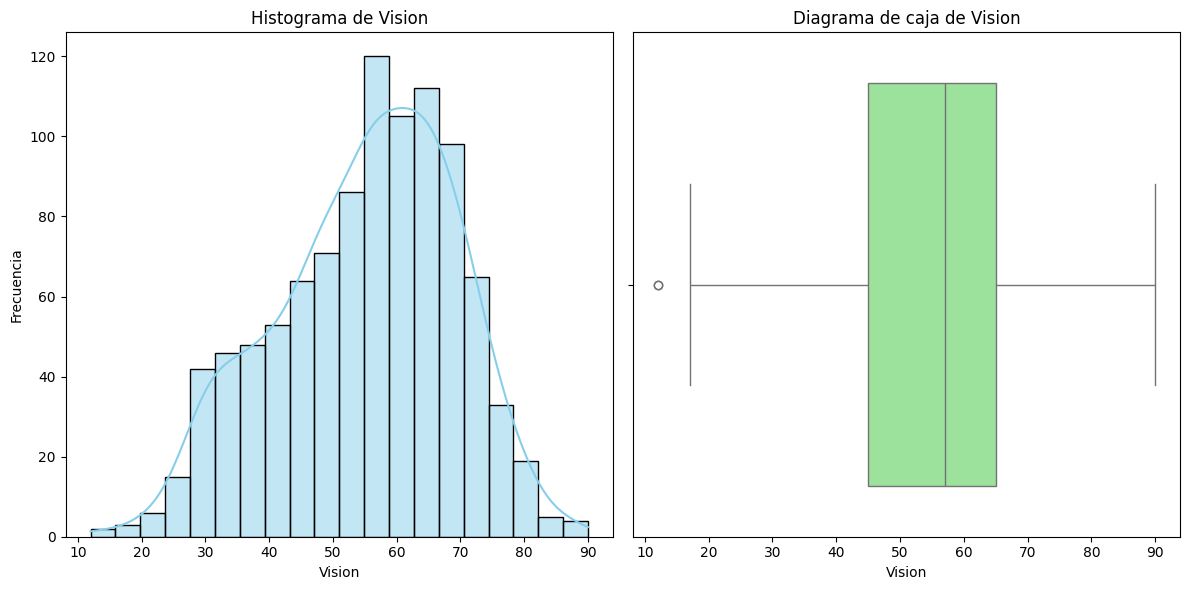

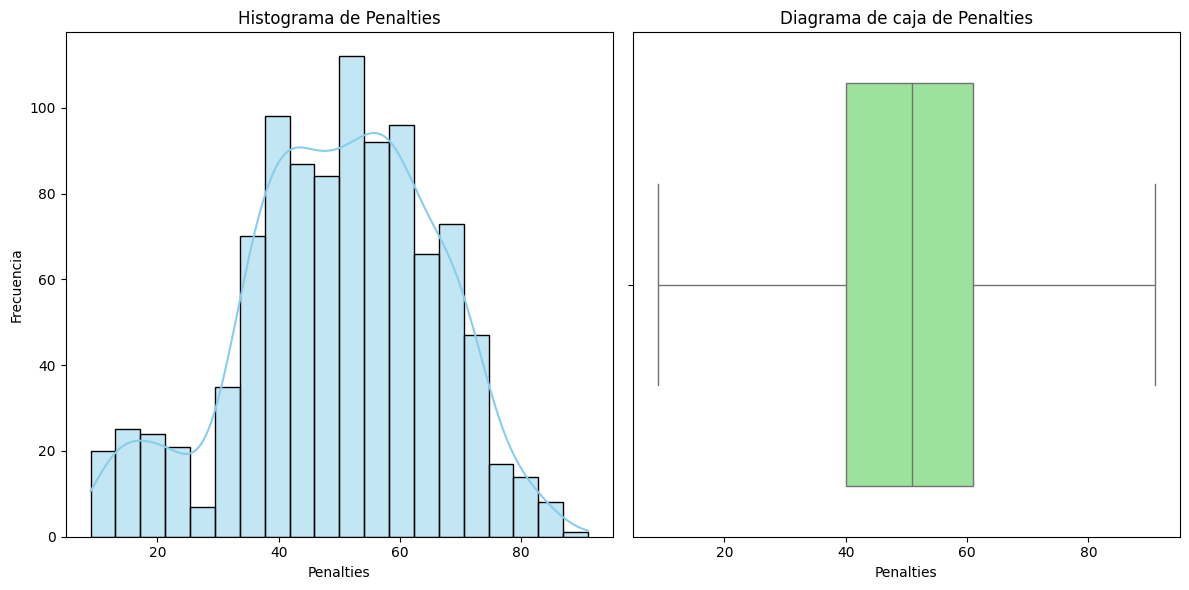

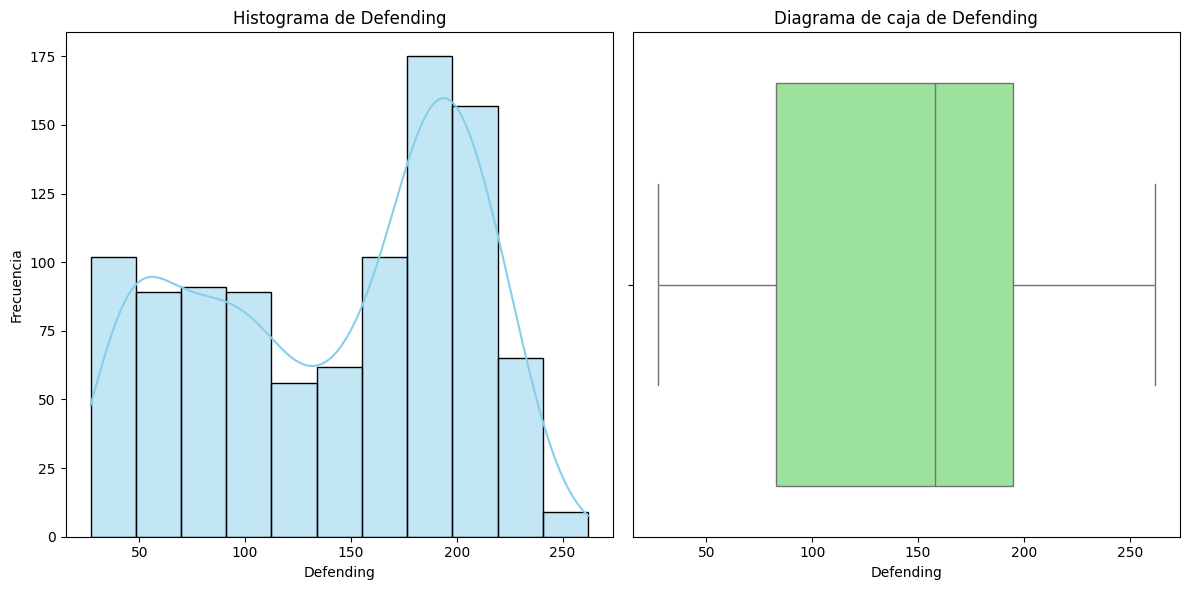

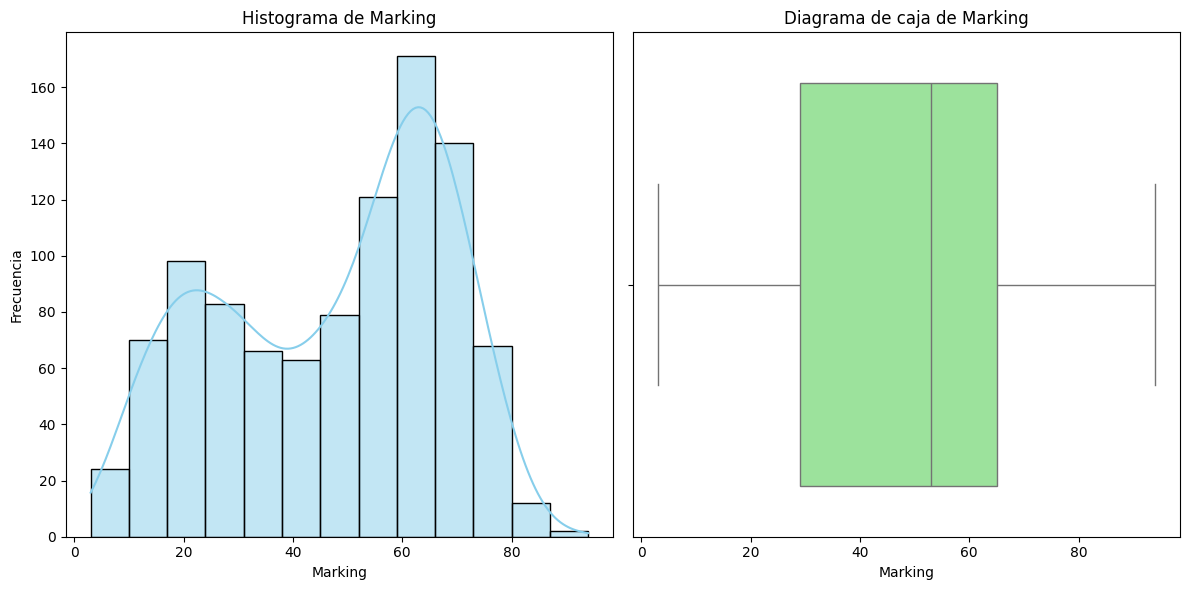

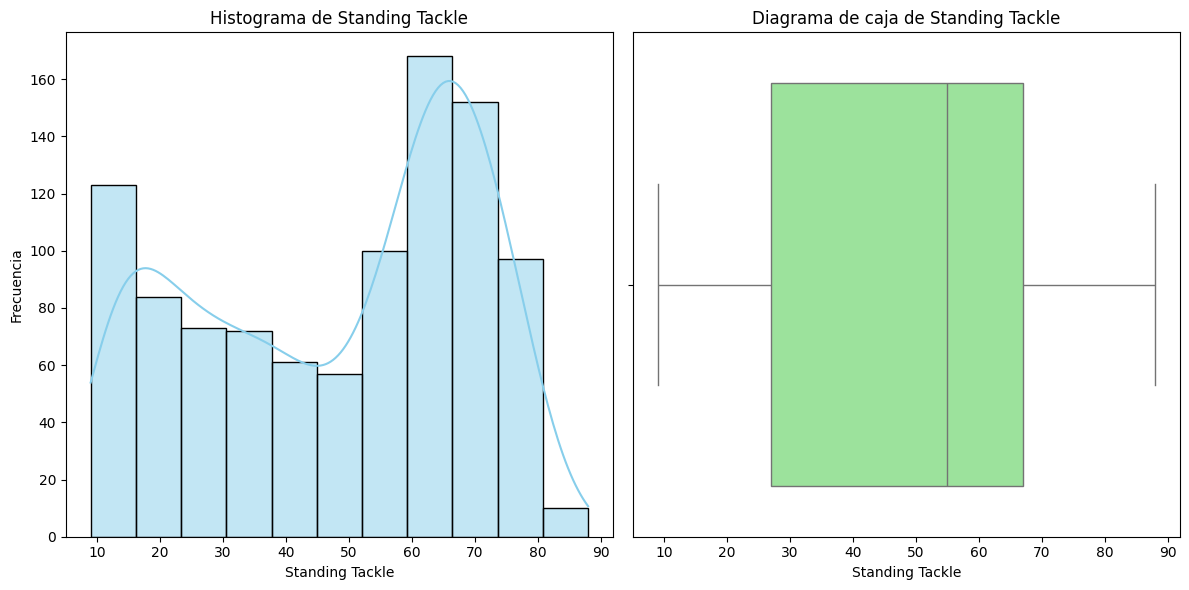

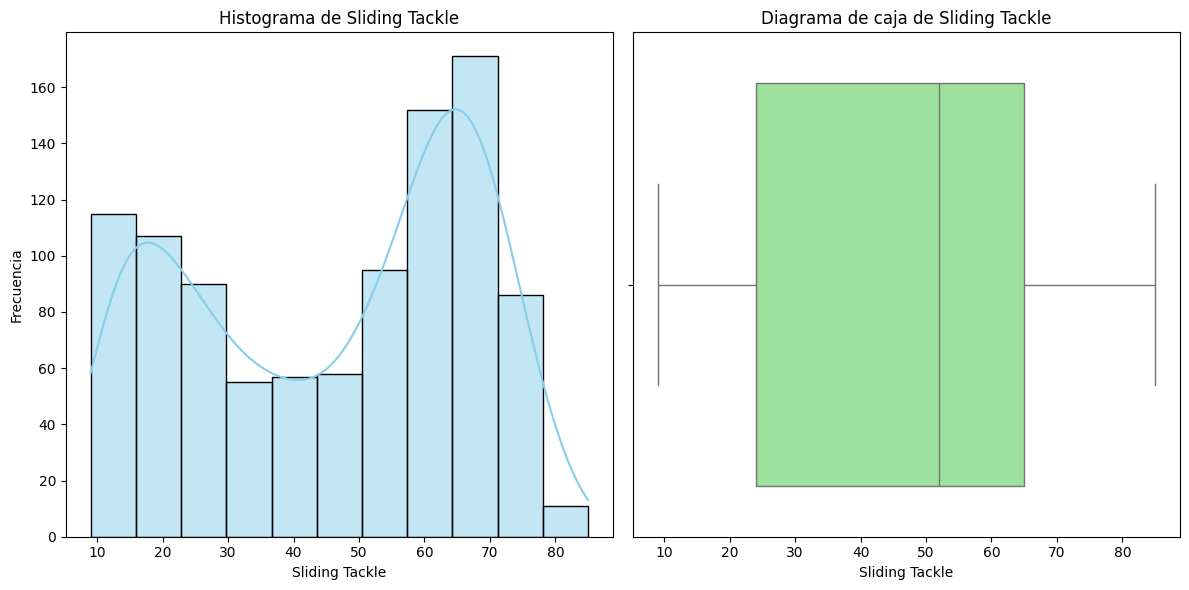

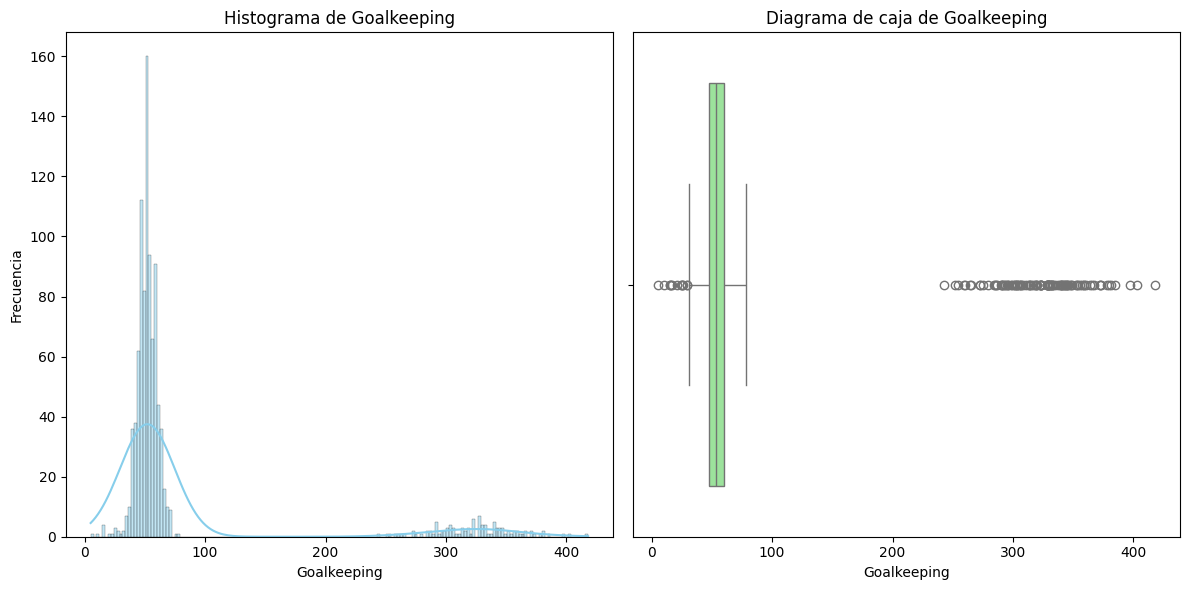

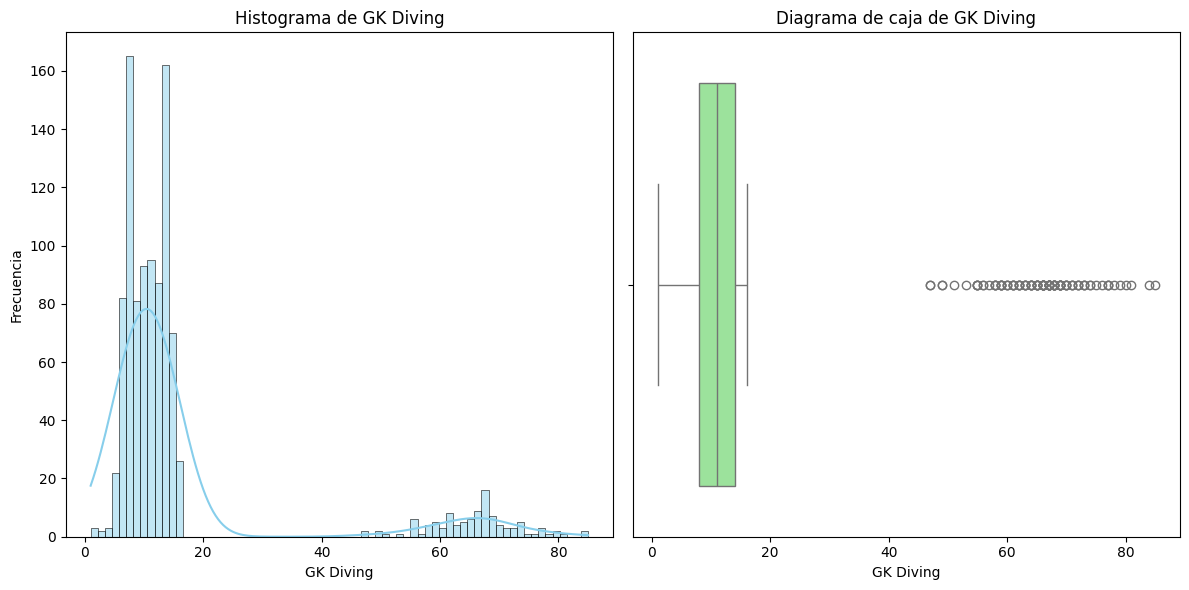

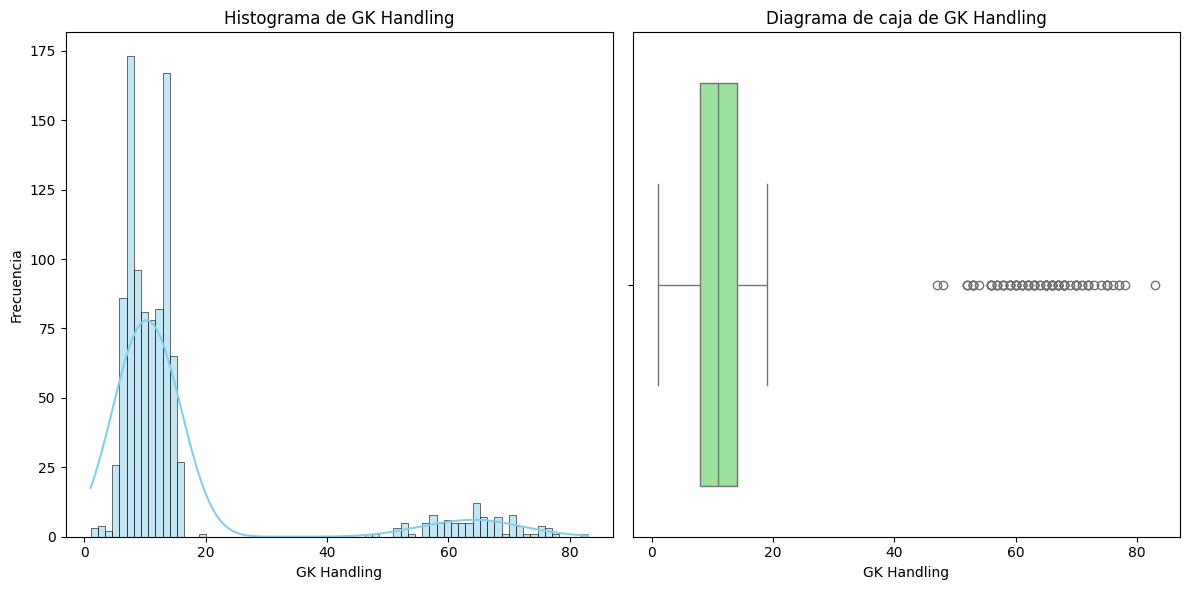

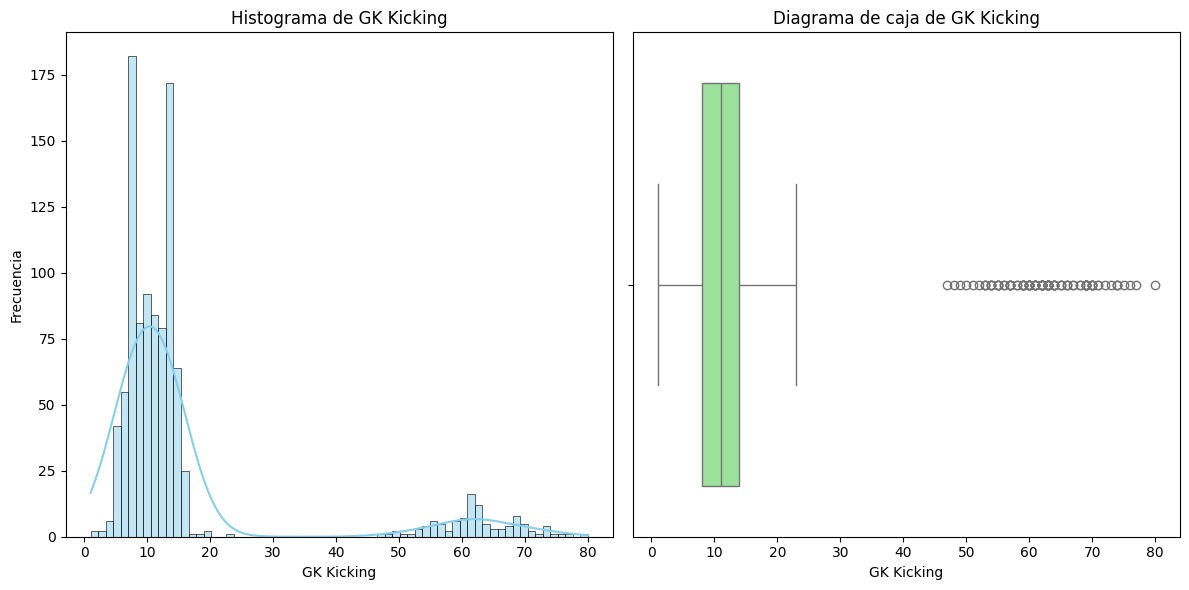

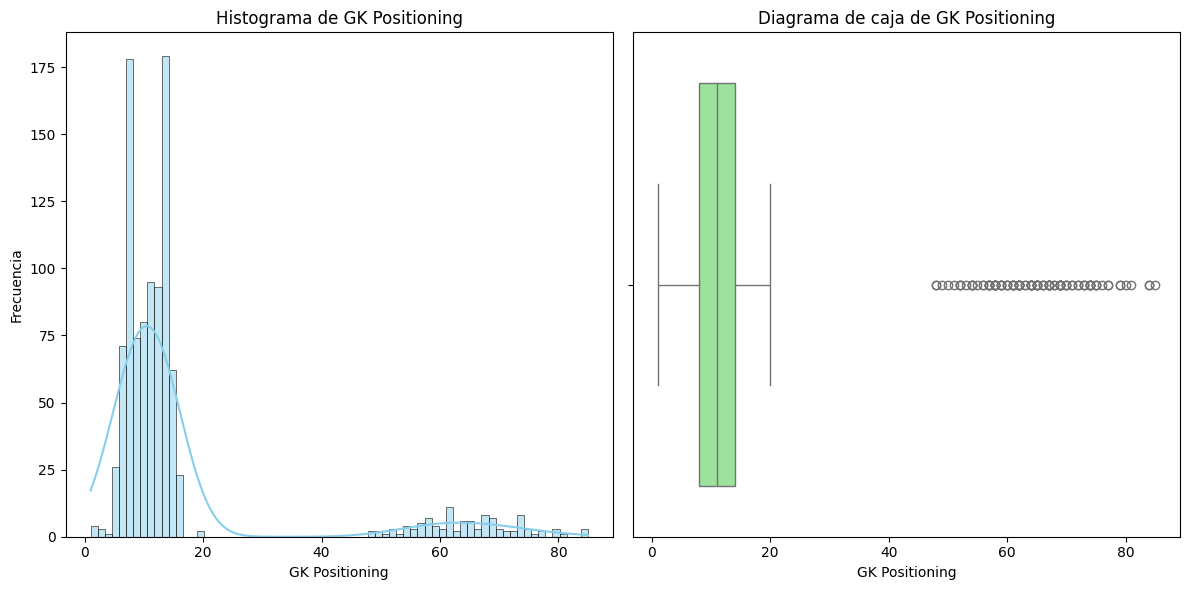

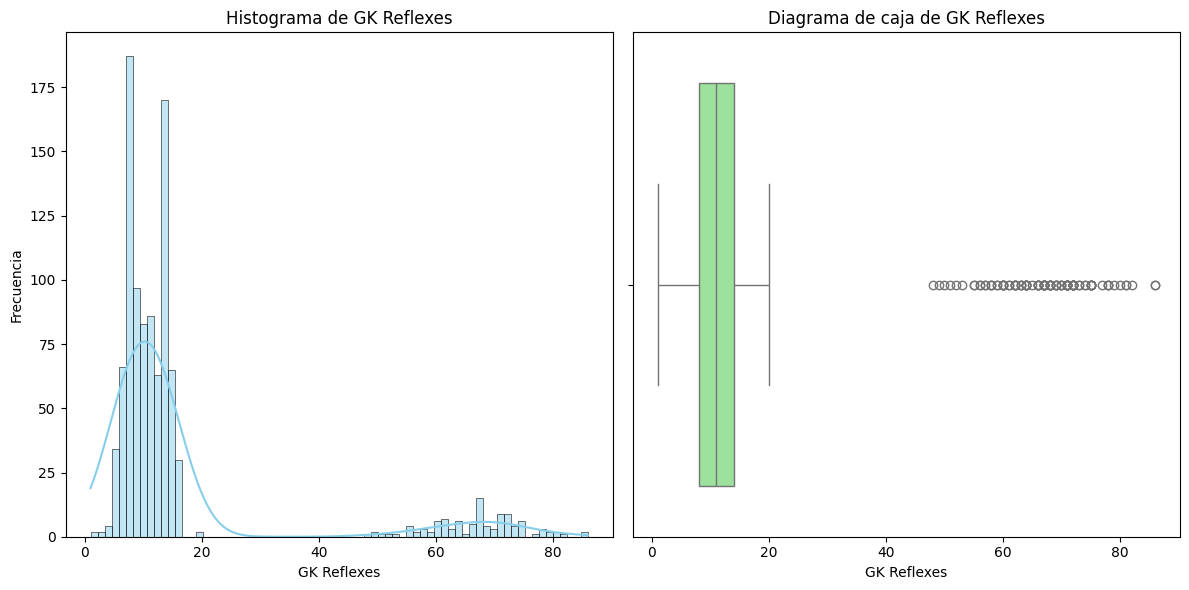

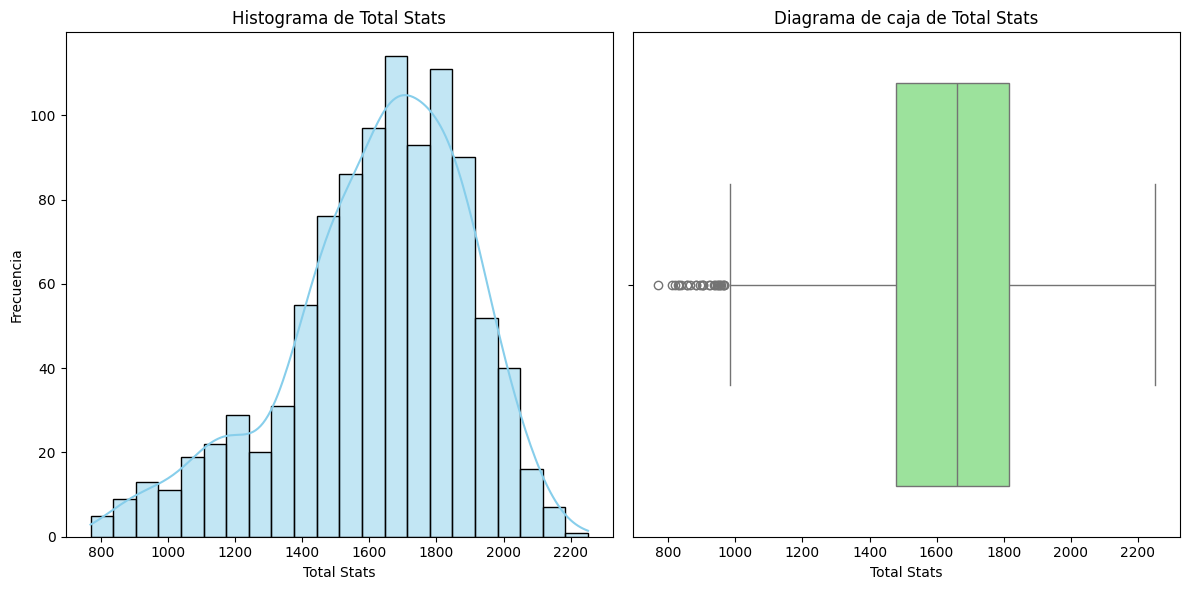

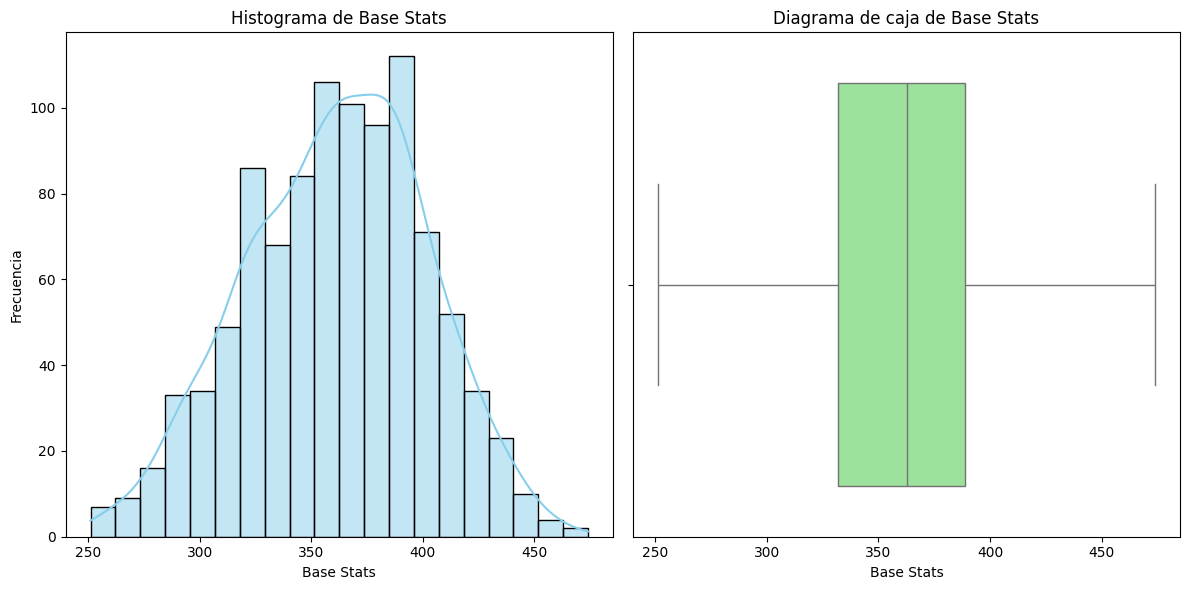

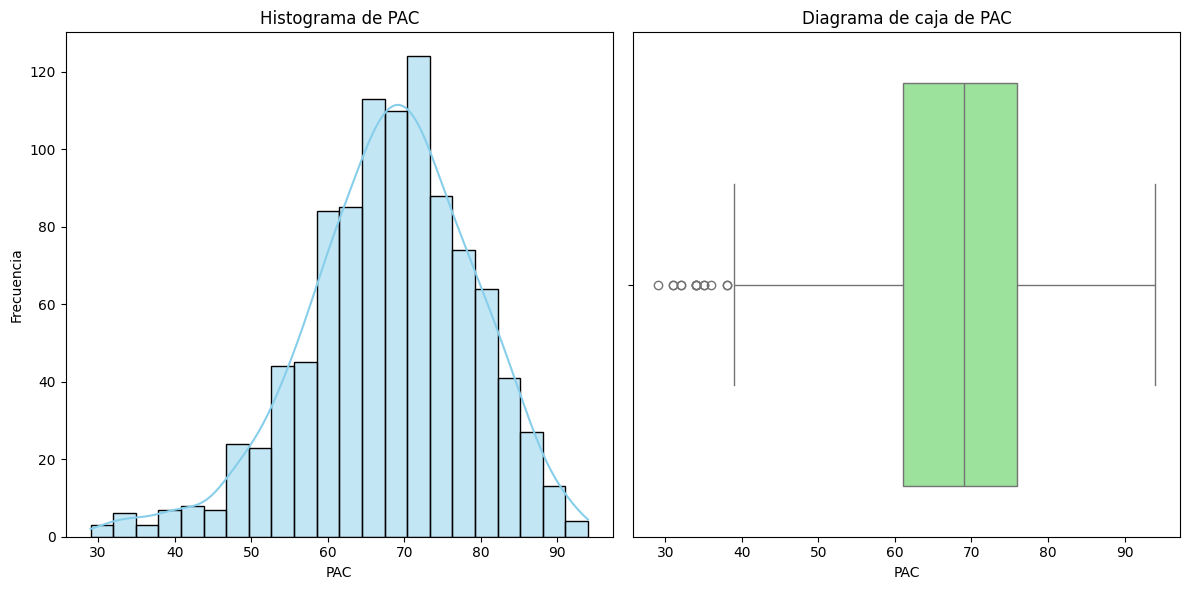

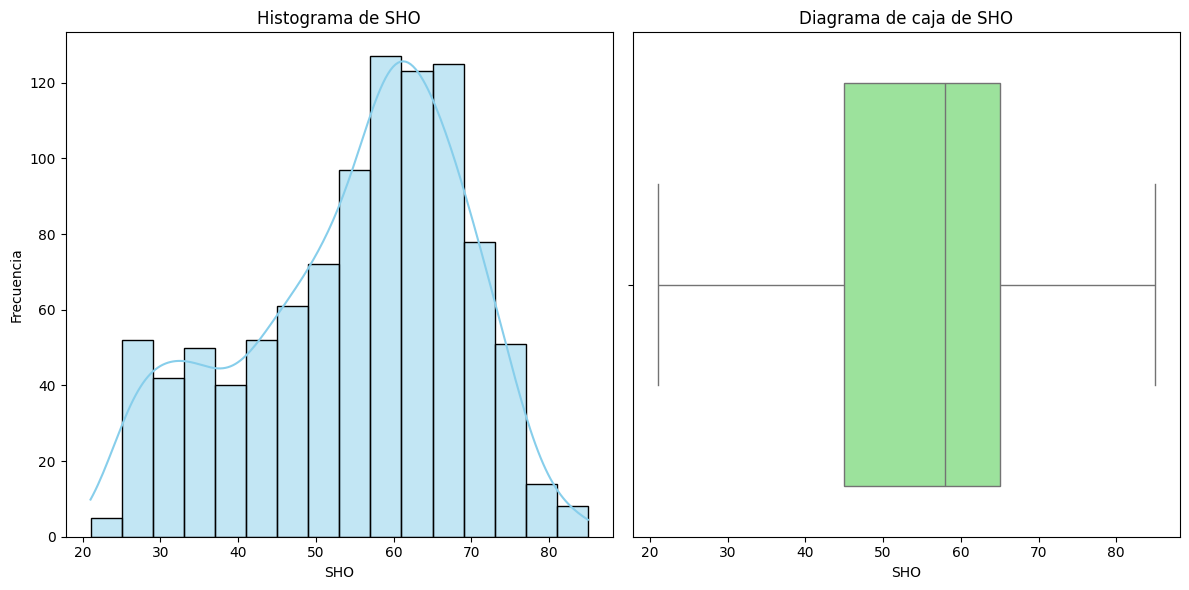

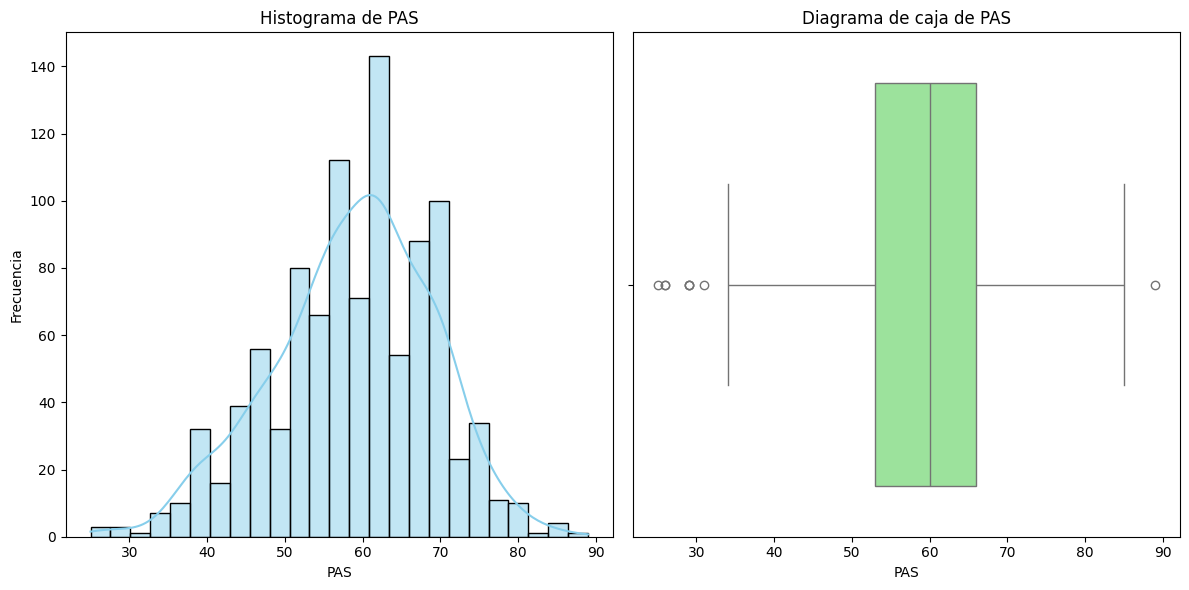

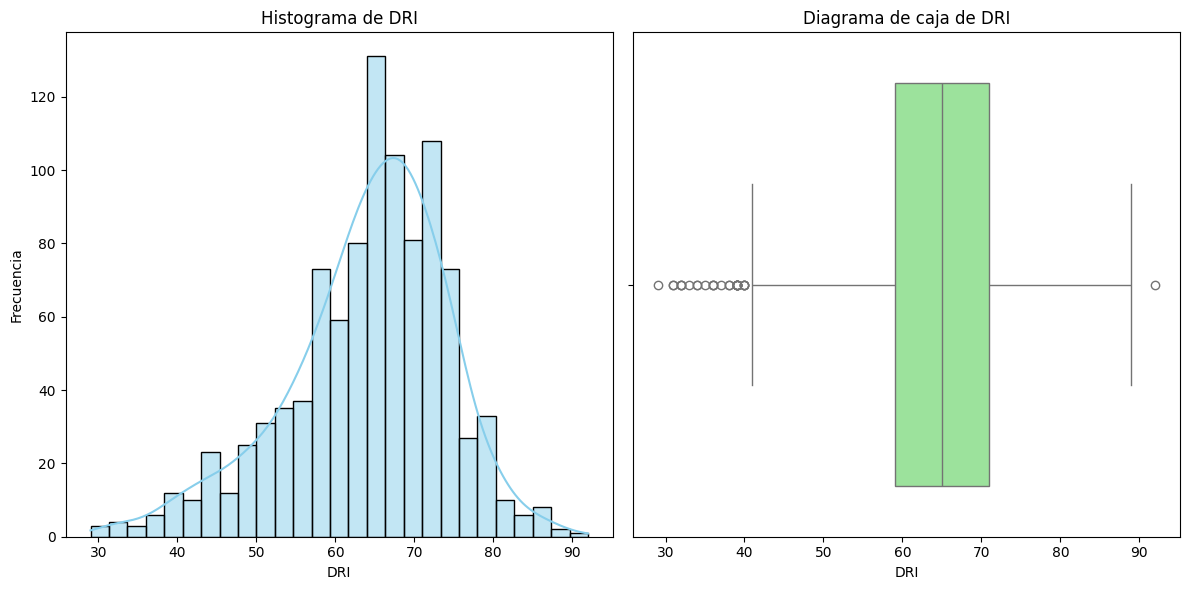

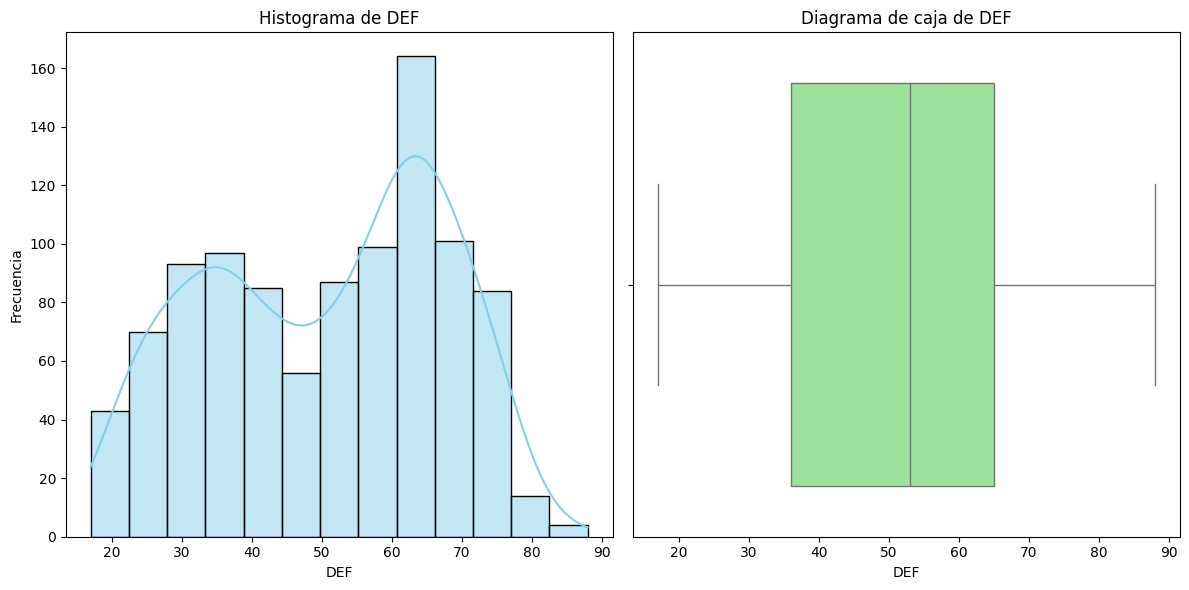

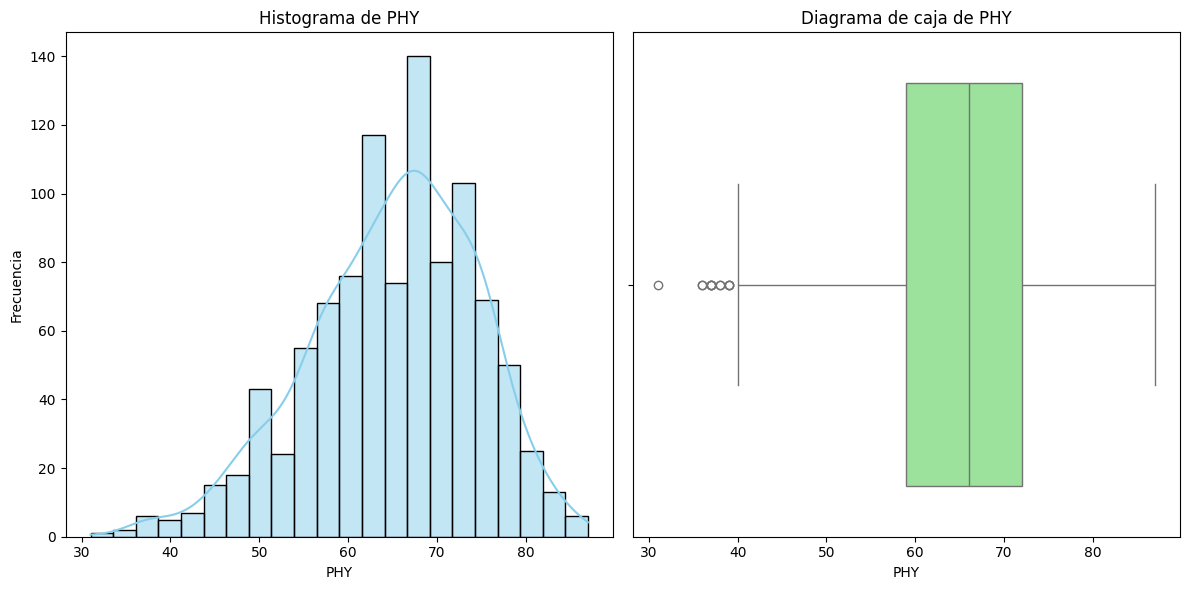

In [ ]:
for column in df.columns:
    # Crear una figura con dos subgráficos
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Histograma
    sns.histplot(df[column], ax=axes[0], kde=True, color='skyblue', edgecolor='black')
    axes[0].set_title('Histograma de {}'.format(column))
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Frecuencia')

    # Diagrama de caja y bigotes
    sns.boxplot(x=df[column], ax=axes[1], color='lightgreen', linewidth=1)
    axes[1].set_title('Diagrama de caja de {}'.format(column))
    axes[1].set_xlabel(column)

    # Ajustar el diseño
    plt.tight_layout()

    # Mostrar los gráficos
    plt.show()

In [ ]:
# Eliminar las columnas "Nationality" y "foot" del DataFrame
df_filtered = df.drop(columns=df.select_dtypes(exclude=[np.number]).columns)

# Calcular la matriz de correlación
corr_matrix = df_filtered.corr()

# Aplicar un estilo de gradiente de color a la matriz de correlación
corr_matrix_styled = corr_matrix.style.background_gradient(cmap=plt.cm.coolwarm)

# Mostrar la matriz de correlación con el estilo aplicado
corr_matrix_styled

In [ ]:
columnas_a_mantener = ["Age", "Nationality", "foot", "POT", "OVA", "BOV", "Height", "PAC", "Base Stats", "Total Stats", "SHO", "PAS", "DRI", "DEF", "PHY"]

# Encuentra las columnas que deseas eliminar
columnas_a_eliminar = [col for col in df.columns if col not in columnas_a_mantener]

# Dropea las columnas que deseas eliminar
df = df.drop(columns=columnas_a_eliminar)

### Conclusion
Con base en este diagrama, se puede ver la correlación que tiene las diferentes variables. Teniendo en cuenta que en un principio se buscaba predecir el OVA, se mira específicamente esta columna. Las correlaciones en esas columnas no son fuertes, por lo tanto en un futuro puede que el modelo presente errores y sea necesario cambiar el objetivo.

#Árbol de decisión

##1.1 Normalización de los datos categóricos

In [ ]:
#Codificación de frecuencia para "Nationality" cuyos valores son nombres de países
# Calcular la frecuencia de cada categoría
frecuencia = df['Nationality'].value_counts()

# Aplicar la codificación de frecuencia
df['nationality_frecuencia'] = df['Nationality'].map(frecuencia)


#Codificación one hot para "foot" que contiene valores de left y right
df = pd.get_dummies(df, columns=['foot'])

# Imprimir el dataframe codificado

print(df)

       Age  OVA     Nationality  BOV  POT  Height  Total Stats  Base Stats  \
7700    24   74          Mexico   75   80  170.18         2002         428   
951     31   75          France   74   75  182.88         1902         408   
4527    30   74  Czech Republic   74   74  180.34         1851         393   
14290   18   59         Morocco   60   76  187.96         1445         304   
5924    24   80         Denmark   81   84  185.42         2070         439   
...    ...  ...             ...  ...  ...     ...          ...         ...   
8871    20   78          Brazil   78   78  185.42         2101         439   
13074   22   66          Brazil   65   71  175.26         1730         372   
200     33   74           Ghana   72   74  177.80         1926         405   
14591   22   63         Austria   65   70  193.04         1477         323   
6927    23   69          France   70   75  180.34         1758         370   

       PAC  SHO  PAS  DRI  DEF  PHY  nationality_frecuencia  fo

In [ ]:
df = df.drop(["Nationality"], axis=1)
df

Age  OVA  BOV  POT  Height  Total Stats  Base Stats  PAC  SHO  PAS  \
7700    24   74   75   80  170.18         2002         428   84   70   69   
951     31   75   74   75  182.88         1902         408   77   68   73   
4527    30   74   74   74  180.34         1851         393   80   71   70   
14290   18   59   60   76  187.96         1445         304   60   57   43   
5924    24   80   81   84  185.42         2070         439   61   70   76   
...    ...  ...  ...  ...     ...          ...         ...  ...  ...  ...   
8871    20   78   78   78  185.42         2101         439   79   67   71   
13074   22   66   65   71  175.26         1730         372   82   45   56   
200     33   74   72   74  177.80         1926         405   53   66   71   
14591   22   63   65   70  193.04         1477         323   54   62   43   
6927    23   69   70   75  180.34         1758         370   73   68   63   

       DRI  DEF  PHY  nationality_frecuencia  foot_Left  foot_Right  
7700    77   62   66                      19      False        True  
951     74   49   67                      65       True       False  
4527    76   36   60                      10      False        True  
14290   55   29   60                      10      False        True  
5924    75   77   80                      16      False        True  
...    ...  ...  ...                     ...        ...         ...  
8871    70   74   78                      53       True       False  
13074   67   62   60                      53      False        True  
200     68   70   77                       7      False        True  
14591   60   27   77                      12      False        True  
6927    72   43   51                      65      False        True  

[997 rows x 16 columns]

In [ ]:
#División del dataset

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

X = df[df.columns] # Features
X = df.drop(columns=['OVA'])

y = df.OVA # Target variable
nombres_columnas = X.columns.tolist()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train.to_csv('train.csv', index=False)
X_test.to_csv('test.csv', index=False)

X_train2, X_test2, y_train2, y_test_2 = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

##1.2 Modelo del árbol de decisión

In [ ]:
#Modelo del árbol

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# feature_cols = ['Age', 'BOV','POT','Height','Weight', 'Base Stats', 'PAC', 'SHO', 'PAS','DRI', 'DEF', 'PHY']

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=9, max_features=20)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.43


In [ ]:
!pip install graphviz

!pip install pydotplus

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.767287 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.767287 to fit



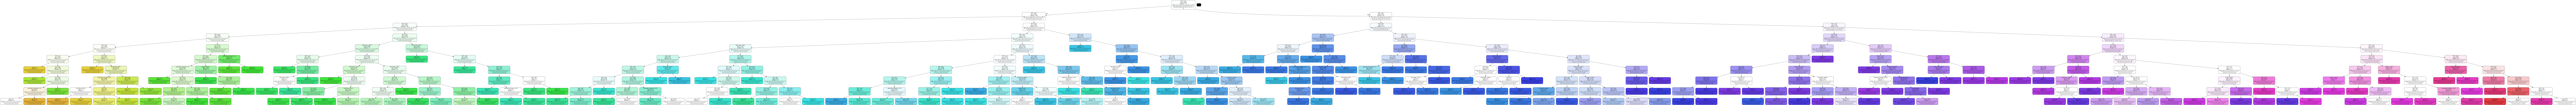

In [ ]:
#Visualización de árbol de decisión
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = nombres_columnas)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('fifa.png')
Image(graph.create_png())

## Conclusiones del Árbol
Ya que el arbol esta contruido con 17 columnas, es bastante extenso y dificil de interpretar. Sin embargo, decidimos continuar con las columnas que originalmente se tenían planeadas usar (Las que los expertos nos recomendaron) ya que segun el analisis, nos dan un accuracy aceptable.

# Conclusiones Generales

A partir de el EDA y la limpieza de datos, hemos definido las columnas con las cuales se va a armar el modelo, y los conjuntos de datos (datasets) que se van a usar para entrenar, probar y validar el algoritmo.

# K-means

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
df.PAC

7700     84
951      77
4527     80
14290    60
5924     61
         ..
8871     79
13074    82
200      53
14591    54
6927     73
Name: PAC, Length: 997, dtype: int64

In [ ]:
X = df

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'WCSS')

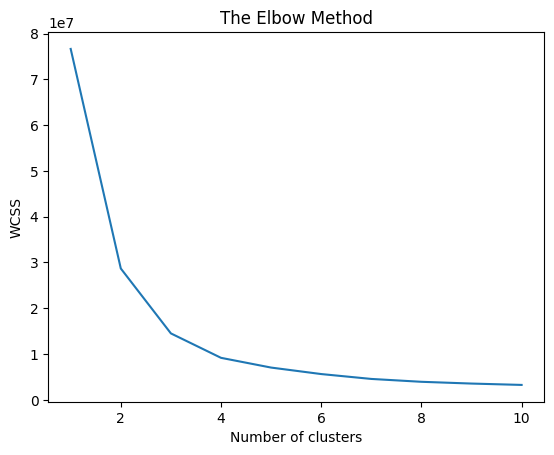

In [ ]:
#Codo
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

Como se puede ver en el gráfico del codo, el punto de inflexión que aparece es en el 3, lo cual indica que el número adecuado de clusters para este caso es de 3.

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
y_kmeans

array([0, 0, 0, 1, 0, 3, 2, 0, 1, 3, 1, 3, 1, 3, 0, 2, 3, 1, 1, 1, 1, 3,
       3, 0, 2, 3, 0, 3, 3, 3, 3, 0, 1, 3, 1, 3, 0, 0, 3, 3, 0, 3, 3, 2,
       0, 0, 3, 1, 3, 1, 1, 3, 3, 0, 1, 0, 3, 3, 0, 3, 3, 0, 1, 3, 3, 3,
       0, 1, 3, 1, 3, 3, 3, 0, 0, 0, 0, 3, 1, 3, 0, 3, 2, 3, 3, 1, 0, 0,
       0, 0, 1, 3, 2, 0, 0, 1, 3, 3, 3, 3, 1, 1, 0, 0, 1, 0, 1, 1, 3, 2,
       2, 0, 1, 0, 2, 3, 1, 0, 1, 0, 0, 3, 3, 0, 0, 1, 1, 0, 3, 1, 1, 3,
       1, 3, 0, 3, 0, 1, 3, 3, 3, 0, 0, 3, 2, 3, 0, 3, 0, 0, 0, 0, 1, 3,
       1, 1, 2, 3, 0, 0, 3, 3, 3, 0, 3, 0, 0, 3, 0, 1, 0, 3, 2, 1, 1, 1,
       2, 0, 0, 0, 2, 1, 2, 0, 3, 0, 2, 0, 0, 1, 3, 3, 0, 3, 0, 3, 3, 0,
       0, 3, 1, 2, 0, 3, 1, 1, 1, 3, 1, 0, 0, 1, 0, 3, 1, 0, 3, 3, 3, 1,
       3, 2, 0, 1, 3, 1, 1, 1, 2, 1, 3, 1, 3, 2, 1, 2, 3, 0, 3, 1, 3, 3,
       3, 0, 0, 0, 1, 0, 2, 3, 1, 1, 0, 1, 1, 1, 2, 1, 0, 0, 3, 3, 3, 3,
       3, 3, 3, 3, 0, 0, 1, 3, 0, 3, 3, 2, 3, 1, 1, 1, 3, 0, 0, 2, 3, 0,
       3, 1, 1, 1, 1, 1, 1, 3, 1, 3, 0, 1, 1, 1, 3,

In [ ]:
df.drop("Clase", axis=1)

Age  OVA  BOV  POT  Height  Total Stats  Base Stats  PAC  SHO  PAS  \
7700    24   74   75   80  170.18         2002         428   84   70   69   
951     31   75   74   75  182.88         1902         408   77   68   73   
4527    30   74   74   74  180.34         1851         393   80   71   70   
14290   18   59   60   76  187.96         1445         304   60   57   43   
5924    24   80   81   84  185.42         2070         439   61   70   76   
...    ...  ...  ...  ...     ...          ...         ...  ...  ...  ...   
8871    20   78   78   78  185.42         2101         439   79   67   71   
13074   22   66   65   71  175.26         1730         372   82   45   56   
200     33   74   72   74  177.80         1926         405   53   66   71   
14591   22   63   65   70  193.04         1477         323   54   62   43   
6927    23   69   70   75  180.34         1758         370   73   68   63   

       DRI  DEF  PHY  nationality_frecuencia  foot_Left  foot_Right  
7700    77   62   66                      19      False        True  
951     74   49   67                      65       True       False  
4527    76   36   60                      10      False        True  
14290   55   29   60                      10      False        True  
5924    75   77   80                      16      False        True  
...    ...  ...  ...                     ...        ...         ...  
8871    70   74   78                      53       True       False  
13074   67   62   60                      53      False        True  
200     68   70   77                       7      False        True  
14591   60   27   77                      12      False        True  
6927    72   43   51                      65      False        True  

[997 rows x 16 columns]

In [ ]:
nueva_columna = [0, 0, 0, 1, 0, 3, 2, 0, 1, 3, 1, 3, 1, 3, 0, 2, 3, 1, 1, 1, 1, 3, 3, 0, 2, 3, 0, 3, 3, 3, 3, 0, 1, 3, 1, 3, 0, 0, 3, 3, 0, 3, 3, 2, 0, 0, 3, 1, 3, 1, 1, 3, 3, 0, 1, 0, 3, 3, 0, 3, 3, 0, 1, 3, 3, 3, 0, 1, 3, 1, 3, 3, 3, 0, 0, 0, 0, 3, 1, 3, 0, 3, 2, 3, 3, 1, 0, 0, 0, 0, 1, 3, 2, 0, 0, 1, 3, 3, 3, 3, 1, 1, 0, 0, 1, 0, 1, 1, 3, 2, 2, 0, 1, 0, 2, 3, 1, 0, 1, 0, 0, 3, 3, 0, 0, 1, 1, 0, 3, 1, 1, 3, 1, 3, 0, 3, 0, 1, 3, 3, 3, 0, 0, 3, 2, 3, 0, 3, 0, 0, 0, 0, 1, 3, 1, 1, 2, 3, 0, 0, 3, 3, 3, 0, 3, 0, 0, 3, 0, 1, 0, 3, 2, 1, 1, 1, 2, 0, 0, 0, 2, 1, 2, 0, 3, 0, 2, 0, 0, 1, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 1, 2, 0, 3, 1, 1, 1, 3, 1, 0, 0, 1, 0, 3, 1, 0, 3, 3, 3, 1, 3, 2, 0, 1, 3, 1, 1, 1, 2, 1, 3, 1, 3, 2, 1, 2, 3, 0, 3, 1, 3, 3, 3, 0, 0, 0, 1, 0, 2, 3, 1, 1, 0, 1, 1, 1, 2, 1, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 1, 3, 0, 3, 3, 2, 3, 1, 1, 1, 3, 0, 0, 2, 3, 0, 3, 1, 1, 1, 1, 1, 1, 3, 1, 3, 0, 1, 1, 1, 3, 0, 0, 3, 0, 2, 2, 3, 1, 0, 1, 1, 2, 1, 3, 1, 3, 3, 1, 0, 0, 1, 1, 0, 0, 0, 3, 2, 3, 3, 1, 1, 3, 1, 2, 2, 1, 3, 0, 3, 3, 2, 3, 2, 3, 1, 2, 2, 0, 0, 0, 3, 1, 0, 0, 1, 3, 1, 3, 1, 3, 2, 3, 1, 1, 3, 3, 0, 0, 3, 1, 1, 1, 0, 1, 3, 3, 1, 1, 3, 0, 0, 0, 1, 0, 0, 3, 3, 0, 0, 0, 0, 1, 1, 0, 0, 3, 0, 3, 3, 0, 1, 1, 3, 0, 1, 0, 2, 2, 1, 3, 0, 3, 3, 0, 3, 1, 3, 1, 1, 3, 0, 3, 3, 0, 3, 3, 1, 1, 3, 0, 1, 1, 3, 2, 2, 0, 0, 0, 0, 0, 2, 3, 0, 1, 3, 1, 3, 2, 3, 2, 0, 1, 3, 0, 0, 1, 3, 2, 3, 3, 1, 3, 3, 1, 0, 0, 1, 3, 2, 3, 0, 3, 3, 0, 1, 3, 0, 1, 1, 1, 0, 2, 0, 0, 2, 0, 0, 1, 1, 1, 2, 3, 3, 0, 3, 0, 3, 3, 0, 3, 2, 2, 3, 1, 3, 2, 0, 1, 0, 3, 1, 2, 2, 2, 3, 3, 1, 2, 0, 2, 3, 1, 3, 3, 0, 1, 1, 1, 1, 0, 1, 3, 0, 2, 3, 1, 1, 1, 3, 0, 2, 3, 1, 2, 3, 3, 3, 1, 2, 1, 3, 0, 0, 2, 3, 0, 1, 2, 1, 3, 0, 0, 0, 1, 0, 1, 3, 0, 3, 3, 1, 2, 1, 0, 3, 3, 1, 3, 2, 3, 1, 2, 3, 1, 1, 1, 3, 0, 1, 0, 3, 3, 0, 3, 1, 3, 3, 2, 0, 3, 3, 1, 0, 3, 3, 1, 1, 2, 1, 0, 0, 0, 3, 1, 3, 0, 3, 3, 0, 2, 1, 1, 2, 3, 2, 2, 0, 0, 0, 0, 2, 2, 3, 0, 1, 0, 3, 3, 3, 3, 2, 1, 0, 0, 0, 1, 0, 3, 1, 1, 0, 1, 1, 0, 0, 1, 3, 1, 3, 3, 2, 2, 0, 0, 0, 1, 2, 3, 0, 3, 1, 3, 3, 3, 2, 3, 1, 1, 2, 3, 3, 3, 0, 0, 3, 3, 1, 3, 3, 0, 3, 3, 3, 3, 1, 1, 1, 2, 2, 0, 2, 0, 3, 3, 0, 3, 2, 0, 3, 2, 3, 3, 3, 3, 0, 2, 2, 1, 1, 3, 1, 3, 0, 1, 3, 3, 1, 2, 0, 1, 3, 2, 1, 3, 2, 1, 2, 3, 1, 0, 3, 0, 0, 1, 1, 0, 3, 3, 0, 1, 0, 1, 3, 0, 2, 3, 1, 3, 3, 1, 1, 0, 0, 3, 3, 2, 0, 1, 1, 2, 3, 3, 1, 2, 3, 0, 1, 0, 2, 1, 3, 3, 1, 2, 1, 0, 0, 3, 2, 3, 1, 3, 2, 2, 3, 2, 0, 0, 2, 3, 0, 2, 1, 1, 3, 1, 3, 1, 1, 3, 0, 0, 0, 1, 2, 2, 1, 2, 1, 0, 1, 1, 0, 0, 3, 3, 0, 0, 1, 2, 0, 1, 3, 1, 3, 3, 1, 2, 0, 0, 0, 3, 0, 3, 1, 3, 0, 0, 0, 1, 1, 1, 1, 3, 1, 3, 3, 3, 1, 3, 3, 3, 0, 0, 0, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 2, 1, 1, 3, 3, 2, 0, 1, 3, 0, 3, 0, 1, 1, 1, 0, 1, 1, 3, 0, 1, 3, 0, 0, 1, 3, 3, 3, 0, 3, 3, 3, 1, 0, 0, 0, 3, 1, 3, 2, 3, 1, 0, 0, 2, 0, 2, 3, 0, 3, 0, 1, 0, 2, 1, 3, 3, 0, 3, 3, 3, 0, 3, 3, 1, 3, 2, 0, 1, 0, 3, 0, 3, 0, 1, 0, 1, 0, 0, 3, 1, 0, 0, 3, 0, 3, 1, 0, 1, 2, 1, 3, 3, 3, 3, 3, 3, 3, 1, 2, 0, 0, 3, 3, 1, 1, 3, 1, 3, 3, 1, 0, 1, 3, 3, 1, 0, 3, 0, 1, 3]

# Agregar una nueva columna al DataFrame con los valores del arreglo
df['Clase'] = nueva_columna

In [ ]:
df

Age  OVA  BOV  POT  Height  Total Stats  Base Stats  PAC  SHO  PAS  \
7700    24   74   75   80  170.18         2002         428   84   70   69   
951     31   75   74   75  182.88         1902         408   77   68   73   
4527    30   74   74   74  180.34         1851         393   80   71   70   
14290   18   59   60   76  187.96         1445         304   60   57   43   
5924    24   80   81   84  185.42         2070         439   61   70   76   
...    ...  ...  ...  ...     ...          ...         ...  ...  ...  ...   
8871    20   78   78   78  185.42         2101         439   79   67   71   
13074   22   66   65   71  175.26         1730         372   82   45   56   
200     33   74   72   74  177.80         1926         405   53   66   71   
14591   22   63   65   70  193.04         1477         323   54   62   43   
6927    23   69   70   75  180.34         1758         370   73   68   63   

       DRI  DEF  PHY  nationality_frecuencia  foot_Left  foot_Right  Clase  
7700    77   62   66                      19      False        True      0  
951     74   49   67                      65       True       False      0  
4527    76   36   60                      10      False        True      0  
14290   55   29   60                      10      False        True      1  
5924    75   77   80                      16      False        True      0  
...    ...  ...  ...                     ...        ...         ...    ...  
8871    70   74   78                      53       True       False      0  
13074   67   62   60                      53      False        True      3  
200     68   70   77                       7      False        True      0  
14591   60   27   77                      12      False        True      1  
6927    72   43   51                      65      False        True      3  

[997 rows x 17 columns]

In [ ]:
# Para facilitar la estadistica descriptiva decidimos ordenar el data set mediante la numeración de la nueva columna (de 0 a 3).

df_ordenado = df.sort_values(by='Clase')

df_ordenado

Age  OVA  BOV  POT  Height  Total Stats  Base Stats  PAC  SHO  PAS  \
7700    24   74   75   80  170.18         2002         428   84   70   69   
4006    26   78   78   79  187.96         1992         429   75   56   69   
12022   20   81   82   89  182.88         1942         414   82   76   78   
2289    31   75   76   75  182.88         2033         435   68   71   68   
10705   19   68   69   82  175.26         1813         389   81   49   60   
...    ...  ...  ...  ...     ...          ...         ...  ...  ...  ...   
2502    30   69   69   69  180.34         1738         377   76   39   59   
13827   22   64   66   72  182.88         1726         371   65   55   62   
9225    23   68   70   75  177.80         1636         359   90   63   51   
15905   19   57   59   74  175.26         1596         338   69   43   55   
6927    23   69   70   75  180.34         1758         370   73   68   63   

       DRI  DEF  PHY  nationality_frecuencia  foot_Left  foot_Right  Clase  
7700    77   62   66                      19      False        True      0  
4006    72   75   82                      72      False        True      0  
12022   80   34   64                      62      False        True      0  
2289    74   75   79                      14      False        True      0  
10705   71   65   63                      34      False        True      0  
...    ...  ...  ...                     ...        ...         ...    ...  
2502    64   64   75                      14      False        True      3  
13827   64   63   62                      12      False        True      3  
9225    69   31   55                      14      False        True      3  
15905   62   50   59                      20      False        True      3  
6927    72   43   51                      65      False        True      3  

[997 rows x 17 columns]

In [ ]:
# Decidimos separar el dataset en 4 grandes grupos e ir mirando ciertas caracteristicas para saber si son las relevantes en su clasificación.

subset1 = df[df['Clase'] == 0]
subset2 = df[df['Clase'] == 1]
subset3 = df[df['Clase'] == 2]
subset4 = df[df['Clase'] == 3]

descripcion1 = subset1.describe()
descripcion2 = subset2.describe()
descripcion3 = subset3.describe()
descripcion4 = subset4.describe()

# E imprimimos cada una de sus descripciones para mirar sus principales diferencias.

print(descripcion1)

              Age         OVA         BOV         POT      Height  \
count  275.000000  275.000000  275.000000  275.000000  275.000000   
mean    27.560000   73.440000   74.163636   75.712727  178.852945   
std      4.196697    4.333607    4.252795    5.169501    5.542692   
min     18.000000   63.000000   64.000000   64.000000  165.100000   
25%     24.000000   70.000000   71.000000   72.000000  175.260000   
50%     28.000000   73.000000   74.000000   75.000000  177.800000   
75%     31.000000   76.000000   77.000000   79.000000  182.880000   
max     38.000000   88.000000   89.000000   91.000000  195.580000   

       Total Stats  Base Stats         PAC         SHO         PAS  \
count   275.000000  275.000000  275.000000  275.000000  275.000000   
mean   1918.687273  405.178182   70.960000   64.196364   68.872727   
std      86.531483   18.987344   10.725602    8.915130    5.439966   
min    1805.000000  363.000000   31.000000   38.000000   58.000000   
25%    1848.000000  390.5000

In [ ]:
print(descripcion2)

              Age         OVA         BOV         POT     Height  Total Stats  \
count  263.000000  263.000000  263.000000  263.000000  263.00000   263.000000   
mean    22.273764   61.349810   62.730038   70.935361  182.79308  1462.528517   
std      4.215696    5.556723    5.363800    5.142215    6.78347    78.380008   
min     17.000000   48.000000   50.000000   54.000000  165.10000  1280.000000   
25%     19.000000   58.000000   59.000000   67.000000  177.80000  1404.500000   
50%     21.000000   61.000000   63.000000   71.000000  182.88000  1478.000000   
75%     24.000000   65.000000   66.000000   75.000000  187.96000  1528.000000   
max     37.000000   85.000000   85.000000   87.000000  200.66000  1578.000000   

       Base Stats         PAC         SHO         PAS         DRI         DEF  \
count  263.000000  263.000000  263.000000  263.000000  263.000000  263.000000   
mean   318.186312   64.536122   42.946768   48.034221   54.669202   47.269962   
std     24.335902   10.6522

In [ ]:
print(descripcion3)

              Age         OVA         BOV         POT      Height  \
count  116.000000  116.000000  116.000000  116.000000  116.000000   
mean    25.198276   63.112069   63.293103   70.198276  187.719138   
std      5.952303    7.838336    7.478685    6.029233    5.046521   
min     16.000000   47.000000   49.000000   55.000000  170.180000   
25%     20.000000   58.750000   58.750000   67.000000  185.420000   
50%     23.500000   64.000000   64.000000   71.000000  187.960000   
75%     30.000000   68.250000   68.250000   74.250000  190.500000   
max     41.000000   79.000000   79.000000   83.000000  200.660000   

       Total Stats  Base Stats         PAC         SHO         PAS  \
count   116.000000  116.000000  116.000000  116.000000  116.000000   
mean   1084.810345  347.224138   64.353448   59.474138   58.525862   
std     126.482301   46.948091    7.211409   12.672093   11.229202   
min     768.000000  251.000000   40.000000   21.000000   25.000000   
25%     988.000000  320.0000

In [ ]:
print(descripcion4)

              Age         OVA         BOV         POT      Height  \
count  343.000000  343.000000  343.000000  343.000000  343.000000   
mean    25.215743   67.271137   68.344023   72.338192  180.051195   
std      4.386994    4.426061    4.127856    5.159097    6.812996   
min     17.000000   56.000000   59.000000   58.000000  154.940000   
25%     22.000000   64.000000   65.000000   68.000000  175.260000   
50%     24.000000   67.000000   68.000000   72.000000  180.340000   
75%     28.000000   70.000000   71.000000   76.000000  185.420000   
max     40.000000   83.000000   81.000000   86.000000  198.120000   

       Total Stats  Base Stats         PAC         SHO         PAS  \
count   343.000000  343.000000  343.000000  343.000000  343.000000   
mean   1694.364431  363.478134   69.696793   54.346939   59.055394   
std      62.845291   14.798805   11.571601   11.338713    5.345914   
min    1579.000000  320.000000   29.000000   26.000000   39.000000   
25%    1639.000000  353.0000

### Conclusiones de la Estadistica Descriptiva de los clusters generados.
<small>

- Cluster #1 = Nos  dimos cuenta Suelen ser los jugadores que se encuentran en etapas más avanzadas de sus carreras deportivas, con **edades típicamente entre los 27 y 38 años**. Tienen un alto potencial y rendimiento general, lo que sugiere que son **jugadores experimentados y altamente habilidosos**. Poseen una altura promedio y suelen destacar por su fortaleza física, lo que les permite competir de manera efectiva en el campo. Además, es probable que este grupo esté compuesto por veteranos y líderes en sus equipos, aportando experiencia y calidad a sus actuaciones.
- Cluster #2 = Por otro lado, en esta segunda clasificación suelen ser jugadores más jóvenes, en etapas tempranas de sus carreras deportivas, **con edades típicamente entre los 17 y 37 años**. Aunque tienen un potencial y rendimiento general más moderados en comparación con el Cluster 1, aún **muestran promesa y habilidades en desarrollo**. Además, tienen una altura promedio similar al Cluster 1, lo que sugiere que pueden estar en camino de desarrollar una presencia física significativa en el campo y es probable que este grupo esté compuesto por talentos emergentes y promesas jóvenes, quienes están en proceso de establecerse y destacarse en el mundo del deporte.
- Cluster #3 = En esta tercera clasificación nos encontramos con que suelen representar una mezcla entre jugadores jóvenes y experimentados, **con edades típicamente entre los 20 y 30 años**. Tienen un potencial y rendimiento general moderados, lo que sugiere que son jugadores sólidos pero no necesariamente estrellas destacadas. Destacan por tener la altura promedio más alta entre los clusters, lo que podría indicar que ocupan posiciones que requieren **mayor estatura**. Es probable además que este grupo esté compuesto por jugadores en una etapa estable de sus carreras, que contribuyen de manera consistente al equipo pero quizás no sean los protagonistas principales.
- Cluster #4 = Finalmente en esta última clasificación nos encontramos con que suelen representar una combinación entre jugadores jóvenes y experimentados, **con edades típicamente entre los 20 y 30 años**. Tienen un potencial y rendimiento general sólidos, lo que sugiere que son jugadores consistentes y confiables en el campo. Aunque tienen una **altura promedio más baja** en comparación con otros clusters, aún poseen las habilidades necesarias para competir efectivamente en su posición y es probable que este grupo esté compuesto por **jugadores versátiles y completos**, que pueden desempeñar múltiples roles en el equipo y contribuir de manera equilibrada en diferentes aspectos del juego.
</small>